In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, Dropout, GRU, Bidirectional, BatchNormalization, Input, Add
from keras.regularizers import l1, l2, l1_l2
from keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive' # , force_remount=True
)

Mounted at /content/drive


In [ ]:
df_0 = pd.read_csv("/content/drive/MyDrive/GolfDB/swing_video_files/launch_models/golf_data_2.csv")

In [ ]:
df_0.drop([5,13,24,25,54,59,64,75,87], inplace=True)

In [ ]:
df_0

,video_id,ball_x_dtl_-5,ball_y_dtl_-5,club_x_dtl_-5,club_y_dtl_-5,ball_dtl_-5_ind,club_dtl_-5_ind,ball_x_face_-5,ball_y_face_-5,club_x_face_-5,...,ball_y_face_6,club_x_face_6,club_y_face_6,ball_face_6_ind,club_face_6_ind,carry,swing_speed,ball_speed,launch_angle,apex
0,1,0,0,92.046895,108.162145,1,1,0,0,411.219944,...,999,-487.131470,113.975945,0,1,167.7,85.4,111.7,16.0,69.3
1,2,0,0,156.944365,188.133840,1,1,0,0,400.117195,...,999,-513.850045,121.146260,0,1,177.7,86.8,116.2,15.8,75.6
2,3,0,0,231.814905,356.211065,1,1,0,0,440.603234,...,999,-468.841435,97.591735,0,1,176.6,88.3,115.7,14.7,68.1
3,4,0,0,242.633895,395.966590,1,1,0,0,400.347230,...,999,-493.985595,120.552350,0,1,176.4,85.3,115.4,16.0,74.8
4,5,0,0,274.963900,449.121545,1,1,0,0,427.198217,...,999,-502.477860,118.961680,0,1,181.7,89.1,118.0,15.1,74.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,0,0,183.037055,295.180925,1,1,0,0,398.935155,...,999,-526.371200,162.775375,0,1,196.1,93.7,125.8,16.7,99.8
89,90,0,0,356.765185,544.138600,1,1,0,0,456.684549,...,999,-483.258350,122.602960,0,1,194.8,92.5,124.3,15.7,89.7
90,91,0,0,244.085505,394.008425,1,1,0,0,406.110480,...,999,-514.935150,142.448590,0,1,192.4,89.7,123.9,17.7,101.6
91,92,0,0,126.686575,193.071150,1,1,0,0,451.611033,...,999,-505.708195,141.104825,0,1,192.6,94.7,124.3,16.8,97.8


In [ ]:
ball_x_dtl = df_0.iloc[:, [61, 73, 85, 97]]
ball_y_dtl = df_0.iloc[:, [62, 74, 86, 98]]
print(ball_x_dtl)
print(ball_y_dtl)

    ball_x_dtl_0  ball_x_dtl_1  ball_x_dtl_2  ball_x_dtl_3
0      -6.638370     -9.582240    -11.723760    -19.237420
1      -0.636650     -9.125945    -23.538785    -27.625335
2      -3.732435     -3.944705     -6.431310     -7.150000
3      -0.265260      0.061890     -0.438715     -0.092280
4      -0.284060     -6.830745     -7.492340     -8.844720
..           ...           ...           ...           ...
88     -4.102840     -6.326780    -10.348110    -12.032460
89     -3.905705     -6.384515    -13.735105    -15.276235
90    -10.685185    -18.766910    -26.925840    -33.026795
91     -3.310180     -8.407590    -12.872955    -16.016295
92     -2.976015     -7.325100     -9.910365    -13.174200

[93 rows x 4 columns]
    ball_y_dtl_0  ball_y_dtl_1  ball_y_dtl_2  ball_y_dtl_3
0     102.903495    144.590445    182.183900    269.882615
1      22.179870     72.851820    196.980465    228.011155
2      49.257815     95.744125    135.517830    171.222485
3      87.884275    135.548035   

In [ ]:
club_x_dtl = df_0.iloc[:, [3,15, 27, 39, 51, 63, 75, 87, 99, 111, 123, 135]]
print(club_x_dtl)
club_y_dtl = df_0.iloc[:, [4,16, 28, 40, 52, 64, 76, 88, 100, 112, 124, 136]]
print(club_y_dtl)

    club_x_dtl_-5  club_x_dtl_-4  club_x_dtl_-3  club_x_dtl_-2  club_x_dtl_-1  \
0       92.046895      55.467650      29.410300      14.751830       5.048880   
1      156.944365     102.364135      62.886690      34.143735      15.770815   
2      231.814905      67.995685      41.198935      23.922965      13.264770   
3      242.633895     172.329930      74.226195      44.124635      23.067165   
4      274.963900     196.147585      46.989565      23.995945       9.401250   
..            ...            ...            ...            ...            ...   
88     183.037055     123.930270      78.940030      46.949210      15.545235   
89     356.765185     266.440920     188.702535      25.537540      13.344120   
90     244.085505     170.097840     114.218475      18.525880       7.590580   
91     126.686575      78.826355      46.173275      25.492885      13.178650   
92     231.550565     162.312685     109.927500      69.221955      40.640600   

    club_x_dtl_0  club_x_dt

In [ ]:
ball_x_face = df_0.iloc[:, [67, 79, 91, 103]]
ball_y_face = df_0.iloc[:, [68, 80, 92, 104]]
print(ball_x_face)
print(ball_y_face)

#0 3

    ball_x_face_0  ball_x_face_1  ball_x_face_2  ball_x_face_3
0      -55.922735    -187.751970    -324.946670    -463.658955
1      -83.161045    -221.914845    -363.861265    -510.230525
2      -19.702380    -157.180300    -297.273565    -440.987065
3      -85.173480    -221.447530    -361.214930    -502.587955
4      -54.182560    -193.171995    -336.197810    -480.767580
..            ...            ...            ...            ...
88    -137.724750    -286.292600    -437.226325    -327.046150
89      -2.426265    -144.714600    -290.813830    -441.389270
90    -118.173250    -266.260525    -417.858550    -316.179950
91     -43.890360    -188.967540    -338.261110    -490.378060
92     -15.428710    -156.431160    -302.399860    -450.767760

[93 rows x 4 columns]
    ball_y_face_0  ball_y_face_1  ball_y_face_2  ball_y_face_3
0       15.219500      53.360120      93.683470     135.199570
1       25.189460      62.623060     102.822520     145.853210
2        5.444335      39.485900

In [ ]:
club_x_face = df_0.iloc[:, [9,21, 33, 45, 57, 69, 81, 93, 105, 117, 129, 141]]
print(club_x_face)
club_y_face = df_0.iloc[:, [10, 22, 34, 46, 58, 70, 82, 94, 106, 118, 130, 142]]
print(club_y_face)

    club_x_face_-5  club_x_face_-4  club_x_face_-3  club_x_face_-2  \
0       411.219944      336.062910      252.834645      161.941450   
1       400.117195      323.713395      239.071965      145.495765   
2       440.603234      367.309600      284.153380      192.503350   
3       400.347230      323.009925      234.971640      143.409660   
4       427.198217      353.016695      266.083920      171.418215   
..             ...             ...             ...             ...   
88      398.935155      313.723705      219.499565      118.355065   
89      456.684549      386.711307      304.633180      209.446290   
90      406.110480      322.785290      229.896860      129.930400   
91      451.611033      373.884425      286.071865      185.921935   
92      464.609786      389.141190      302.159285      204.391910   

    club_x_face_-1  club_x_face_0  club_x_face_1  club_x_face_2  \
0        68.488870     -22.319835    -106.293850    -189.942535   
1        48.511815     -3

In [ ]:
type(club_x_face)

pandas.core.frame.DataFrame

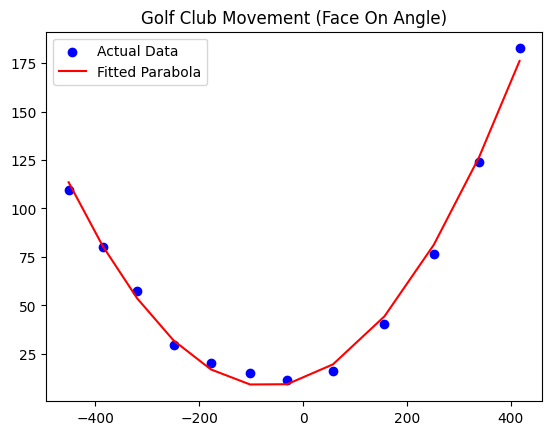

In [ ]:
def fit_parabola_to_trajectory(x_data, y_data):
    # Fit a parabola to y as a function of x
    a, b, c = np.polyfit(x_data, y_data, 2)
    return a, b, c

# Lists to store the fitted parameters
a_coeffs = []
b_coeffs = []
c_coeffs = []

# Iterate over each row in the data
for index in range(len(club_x_face)):
    x_data = club_x_face.iloc[index].values
    y_data = club_y_face.iloc[index].values

    a, b, c = fit_parabola_to_trajectory(x_data, y_data)
    a_coeffs.append(a)
    b_coeffs.append(b)
    c_coeffs.append(c)


def get_predicted_y(a, b, c, x_data):
    return a * x_data**2 + b * x_data + c

residuals_list = []
rmse_list = []

# Iterate over each row in the data
for index in range(len(club_x_face)):
    x_data = club_x_face.iloc[index].values
    y_data = club_y_face.iloc[index].values
    a, b, c = a_coeffs[index], b_coeffs[index], c_coeffs[index]

    y_pred = get_predicted_y(a, b, c, x_data)

    residuals = y_data - y_pred
    residuals_list.append(residuals)

    rmse = np.sqrt(np.mean(residuals**2))
    rmse_list.append(rmse)

import matplotlib.pyplot as plt

# Example: visualize the fit for the 10th swing
index = 9
x_data = club_x_face.iloc[index].values
y_data = club_y_face.iloc[index].values
y_pred = get_predicted_y(a_coeffs[index], b_coeffs[index], c_coeffs[index], x_data)

plt.scatter(x_data, y_data, color='blue', label='Actual Data')
plt.plot(x_data, y_pred, color='red', label='Fitted Parabola')
plt.legend()
plt.title('Golf Club Movement (Face On Angle)')

# plt.xlabel('X-coordinates')
# plt.ylabel('Y-coordinates')
plt.show()


def velocity(a, b, x_data):
    return 2 * a * x_data + b

# Lists to store the speed at each frame
c_f_speed_lists = []

# Iterate over each row in the data
for index in range(len(club_x_face)):
    x_data = club_x_face.iloc[index].values
    a, b = a_coeffs[index], b_coeffs[index]

    speeds = velocity(a, b, x_data)
    c_f_speed_lists.append(speeds)

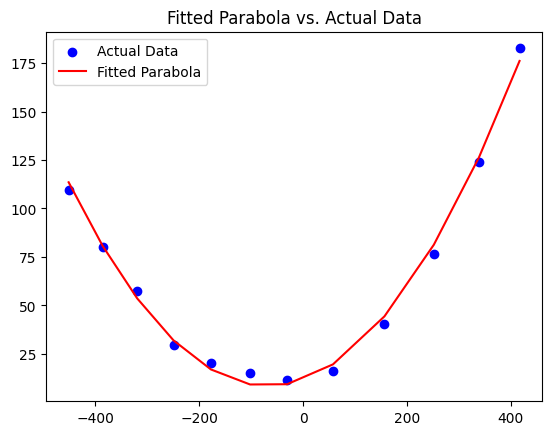

In [ ]:
def fit_parabola_to_trajectory(x_data, y_data):
    # Fit a parabola to y as a function of x
    a, b, c = np.polyfit(x_data, y_data, 2)
    return a, b, c

# Lists to store the fitted parameters
a_coeffs = []
b_coeffs = []
c_coeffs = []

# Iterate over each row in the data
for index in range(len(club_x_face)):
    x_data = club_x_face.iloc[index].values
    y_data = club_y_face.iloc[index].values

    a, b, c = fit_parabola_to_trajectory(x_data, y_data)
    a_coeffs.append(a)
    b_coeffs.append(b)
    c_coeffs.append(c)


def get_predicted_y(a, b, c, x_data):
    return a * x_data**2 + b * x_data + c

residuals_list = []
rmse_list = []

# Iterate over each row in the data
for index in range(len(club_x_face)):
    x_data = club_x_face.iloc[index].values
    y_data = club_y_face.iloc[index].values
    a, b, c = a_coeffs[index], b_coeffs[index], c_coeffs[index]

    y_pred = get_predicted_y(a, b, c, x_data)

    residuals = y_data - y_pred
    residuals_list.append(residuals)

    rmse = np.sqrt(np.mean(residuals**2))
    rmse_list.append(rmse)

import matplotlib.pyplot as plt

# Example: visualize the fit for the 10th swing
index = 9
x_data = club_x_face.iloc[index].values
y_data = club_y_face.iloc[index].values
y_pred = get_predicted_y(a_coeffs[index], b_coeffs[index], c_coeffs[index], x_data)

plt.scatter(x_data, y_data, color='blue', label='Actual Data')
plt.plot(x_data, y_pred, color='red', label='Fitted Parabola')
plt.legend()
plt.title('Fitted Parabola vs. Actual Data')
plt.show()


def velocity(a, b, x_data):
    return 2 * a * x_data + b

# Lists to store the speed at each frame
c_f_speed_lists = []

# Iterate over each row in the data
for index in range(len(club_x_face)):
    x_data = club_x_face.iloc[index].values
    a, b = a_coeffs[index], b_coeffs[index]

    speeds = velocity(a, b, x_data)
    c_f_speed_lists.append(speeds)

In [ ]:
interaction_terms

[array([267.35495718, 184.97855066, 111.24638042,  51.72322212,
         13.38249599,  -1.67190649,   3.88126686,  28.0173016 ,
         68.24702196, 123.46289395, 190.3849141 , 263.94265206]),
 array([265.8990774 , 181.88619715, 107.13408637,  46.90319314,
          9.31580593,  -2.91252572,   5.71608602,  32.48034301,
         77.0184854 , 135.86236002, 208.32794069, 289.6698763 ]),
 array([ 3.24072450e+02,  2.33279167e+02,  1.48092844e+02,  7.61552849e+01,
         2.52156643e+01, -1.98623032e-01, -1.55611808e+00,  1.77893514e+01,
         5.36029452e+01,  1.02986893e+02,  1.65473951e+02,  2.39336787e+02]),
 array([263.12034645, 177.97693607, 101.05206139,  43.63751356,
          7.47666354,  -2.08735832,   7.56726974,  35.85961617,
         79.33954344, 136.07240141, 205.50068394, 282.20310295]),
 array([306.29958254, 217.02473181, 131.70507233,  62.48593191,
         15.92274862,  -2.13251101,   2.1636457 ,  27.50834331,
         70.77169062, 130.25066562, 203.04068937, 283.461466

In [ ]:
interaction_terms = []

# Iterate over each row in the data
for index in range(len(club_x_face)):
    x_data = club_x_face.iloc[index].values
    speeds = c_f_speed_lists[index]

    # Multiply position with speed for each frame
    interactions = x_data * speeds
    interaction_terms.append(interactions)



In [ ]:
import statsmodels.api as sm

# Assuming you have a DataFrame named df with the carry distance and interaction term
# Let's say 'carry_distance' is the column name for carry distance
# And 'interaction' is the column name for your interaction term

# Adding a constant to the independent variable is required for statsmodels
X = sm.add_constant(interaction_terms)
y = df_0['carry']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  carry   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     3.589
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           0.000269
Time:                        21:56:45   Log-Likelihood:                -300.99
No. Observations:                  93   AIC:                             628.0
Df Residuals:                      80   BIC:                             660.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.3835     22.199      4.567      0.0

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

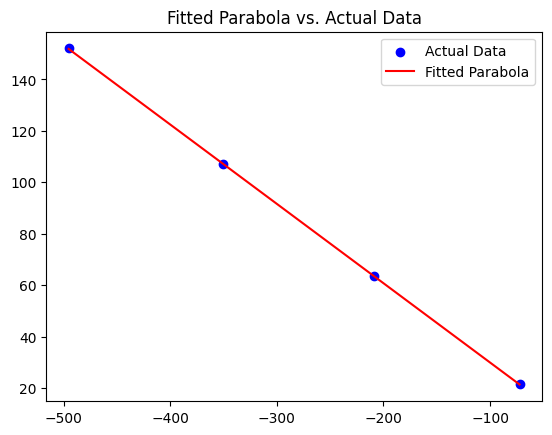

In [ ]:
def fit_parabola_to_trajectory(x_data, y_data):
    # Fit a parabola to y as a function of x
    # a, b, c = np.polyfit(x_data, y_data, 2)
    # return a, b, c
    m, c = np.polyfit(x_data, y_data, 1)
    return m, c

# Lists to store the fitted parameters
d_coeffs = []
e_coeffs = []

# Iterate over each row in the data
for index in range(len(ball_x_face)):
    x_data = ball_x_face.iloc[index].values
    y_data = ball_y_face.iloc[index].values

    m, c = fit_parabola_to_trajectory(x_data, y_data)
    d_coeffs.append(m)
    e_coeffs.append(c)


def get_predicted_y(m, c, x_data): #a, b, c, x_data):
    return m * x_data + c

residuals_list = []
rmse_list = []

# Iterate over each row in the data
for index in range(len(ball_x_face)):
    x_data = ball_x_face.iloc[index].values
    y_data = ball_y_face.iloc[index].values
    m, c = d_coeffs[index], e_coeffs[index]  #, f_coeffs[index]

    y_pred = get_predicted_y(m, c, x_data)

    residuals = y_data - y_pred
    residuals_list.append(residuals)

    rmse = np.sqrt(np.mean(residuals**2))
    rmse_list.append(rmse)

import matplotlib.pyplot as plt

# Example: visualize the fit for the 10th swing
index = 9
x_data = ball_x_face.iloc[index].values
y_data = ball_y_face.iloc[index].values
y_pred = get_predicted_y(d_coeffs[index], e_coeffs[index], x_data)

plt.scatter(x_data, y_data, color='blue', label='Actual Data')
plt.plot(x_data, y_pred, color='red', label='Fitted Parabola')
plt.legend()
plt.title('Fitted Parabola vs. Actual Data')
plt.show()


b_f_speed_lists = []

for index in range(len(ball_x_face)):
    m = d_coeffs[index]  # Slope represents the speed for a linear fit
    speeds = [m] * len(ball_x_face.iloc[index].values)  # Constant speed for each frame
    b_f_speed_lists.append(speeds)

# Lists to store the interaction terms
ball_interaction_terms = []

# Iterate over each row in the data
for index in range(len(ball_x_face)):
    x_data = ball_x_face.iloc[index].values
    speeds = b_f_speed_lists[index]

    # Multiply position with constant speed for each frame
    interactions = x_data * speeds
    ball_interaction_terms.append(interactions)

In [ ]:
import statsmodels.api as sm

# Adding a constant to the independent variable is required for statsmodels
X_2 = sm.add_constant(ball_interaction_terms)
y = df_0['carry']

model = sm.OLS(y, X_2).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  carry   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     3.725
Date:                Thu, 17 Aug 2023   Prob (F-statistic):            0.00756
Time:                        22:20:54   Log-Likelihood:                -313.74
No. Observations:                  93   AIC:                             637.5
Df Residuals:                      88   BIC:                             650.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        172.4852      5.648     30.537      0.0

In [ ]:
pd.DataFrame(np.array(ball_interaction_terms)[:, [3]])
pd.DataFrame(X_simple)

,0
0,136.431179
1,144.226661
2,113.420989
3,156.862124
4,136.618729
...,...
88,85.386333
89,134.064977
90,81.380322
91,132.942863


In [ ]:
pd.DataFrame(X_simple).rename(columns={0:"cf_poly_1", 1:"cf_poly_2"})

,cf_poly_1,cf_poly_2
0,13.382496,-1.671906
1,9.315806,-2.912526
2,25.215664,-0.198623
3,7.476664,-2.087358
4,15.922749,-2.132511
...,...,...
88,2.021802,-0.155309
89,29.913153,1.104736
90,4.256475,-1.408191
91,19.998563,-1.257784


In [ ]:
pd.concat([pd.DataFrame(X_simple).rename(columns={0:"cf_poly_1", 1:"cf_poly_2"}), pd.DataFrame(np.array(ball_interaction_terms)[:, [3]]).rename(columns={0:"bf_line"})], axis=1)

,cf_poly_1,cf_poly_2,bf_line
0,13.382496,-1.671906,136.431179
1,9.315806,-2.912526,144.226661
2,25.215664,-0.198623,113.420989
3,7.476664,-2.087358,156.862124
4,15.922749,-2.132511,136.618729
...,...,...,...
88,2.021802,-0.155309,85.386333
89,29.913153,1.104736,134.064977
90,4.256475,-1.408191,81.380322
91,19.998563,-1.257784,132.942863


In [ ]:
X_combined_df = pd.concat([pd.DataFrame(X_simple).rename(columns={0:"cf_poly_1", 1:"cf_poly_2"}),
                           pd.DataFrame(np.array(ball_interaction_terms)[:, [3]]).rename(columns={0:"bf_line"})], axis=1)

# Splitting the data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X_combined_df, y, test_size=0.2, random_state=42)

# 1. Linear Regression:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_test = lin_reg.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'Linear Regression Test RMSE: {rmse_test}')

# 2. Random Forest:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_test_rf = rf_reg.predict(X_test)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
print(f'Random Forest Test RMSE: {rmse_test_rf}')

# 3. Gradient Boosting:
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_test_gb = gb_reg.predict(X_test)
rmse_test_gb = np.sqrt(mean_squared_error(y_test, y_pred_test_gb))
print(f'Gradient Boosting Test RMSE: {rmse_test_gb}')

Linear Regression Test RMSE: 8.722845959493686
Random Forest Test RMSE: 8.754845924280703
Gradient Boosting Test RMSE: 9.56446134439463


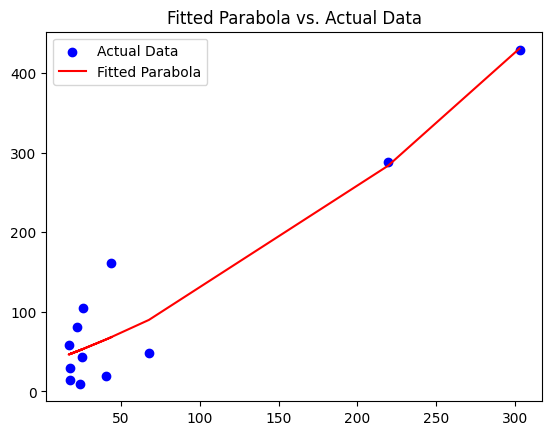

In [ ]:
def fit_parabola_to_trajectory(x_data, y_data):
    # Fit a parabola to y as a function of x
    a, b, c = np.polyfit(x_data, y_data, 2)
    return a, b, c

# Lists to store the fitted parameters
g_coeffs = []
h_coeffs = []
i_coeffs = []

# Iterate over each row in the data
for index in range(len(club_x_dtl)):
    x_data = club_x_dtl.iloc[index].values
    y_data = club_y_dtl.iloc[index].values

    a, b, c = fit_parabola_to_trajectory(x_data, y_data)
    g_coeffs.append(a)
    h_coeffs.append(b)
    i_coeffs.append(c)


def get_predicted_y(a, b, c, x_data):
    return a * x_data**2 + b * x_data + c

residuals_list = []
rmse_list = []

# Iterate over each row in the data
for index in range(len(club_x_dtl)):
    x_data = club_x_dtl.iloc[index].values
    y_data = club_y_dtl.iloc[index].values
    a, b, c = g_coeffs[index], h_coeffs[index], i_coeffs[index]

    y_pred = get_predicted_y(a, b, c, x_data)

    residuals = y_data - y_pred
    residuals_list.append(residuals)

    rmse = np.sqrt(np.mean(residuals**2))
    rmse_list.append(rmse)

import matplotlib.pyplot as plt

# Example: visualize the fit for the 10th swing
index = 9
x_data = club_x_dtl.iloc[index].values
y_data = club_y_dtl.iloc[index].values
y_pred = get_predicted_y(g_coeffs[index], h_coeffs[index], i_coeffs[index], x_data)

plt.scatter(x_data, y_data, color='blue', label='Actual Data')
plt.plot(x_data, y_pred, color='red', label='Fitted Parabola')
plt.legend()
plt.title('Fitted Parabola vs. Actual Data')
plt.show()


# Lists to store the speed at each frame
c_d_speed_lists = []

# Iterate over each row in the data
for index in range(len(club_x_dtl)):
    x_data = club_x_dtl.iloc[index].values
    a, b = g_coeffs[index], h_coeffs[index]

    speeds = velocity(a, b, x_data)
    c_d_speed_lists.append(speeds)

In [ ]:
c_d_interaction_terms = []

# Iterate over each row in the data
for index in range(len(club_x_dtl)):
    x_data = club_x_dtl.iloc[index].values
    speeds = c_d_speed_lists[index]

    # Multiply position with speed for each frame
    interactions = x_data * speeds
    c_d_interaction_terms.append(interactions)

In [ ]:
X_3 = sm.add_constant(c_d_interaction_terms)
y = df_0['carry']

model = sm.OLS(y, X_3).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  carry   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                 -0.062
Method:                 Least Squares   F-statistic:                    0.5508
Date:                Thu, 17 Aug 2023   Prob (F-statistic):              0.874
Time:                        22:34:40   Log-Likelihood:                -317.32
No. Observations:                  93   AIC:                             660.6
Df Residuals:                      80   BIC:                             693.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        181.1231      2.609     69.428      0.0

In [ ]:
# nothing significant here, pivot to ellipse
print(club_x_dtl.values.ravel().shape)
print(club_y_dtl.shape)

(1116,)
(93, 12)


In [ ]:
def fit_ellipse(x, y):
    # Design matrix
    D = np.vstack([x**2, x*y, y**2, x, y, np.ones_like(x)]).T

    # Scatter matrix
    S = np.dot(D.T, D)

    # Constraint matrix
    C = np.zeros([6, 6])
    C[0, 2] = 2
    C[2, 0] = 2
    C[1, 1] = -1

    # Solve generalized eigenproblem
    evals, evecs = np.linalg.eig(np.linalg.inv(S).dot(C))

    # Find the positive eigenvalue
    idx = np.argmax(np.abs(evals))
    a = evecs[:, idx]

    return a


def ellipse_axes(a):
    # Construct the conic section matrix
    M = np.array([[a[0], a[1]/2, a[3]/2],
                  [a[1]/2, a[2], a[4]/2],
                  [a[3]/2, a[4]/2, a[5]]])

    # Eigenvalues and eigenvectors of the upper-left 2x2 submatrix
    eig_vals, eig_vecs = np.linalg.eig(M[:2, :2])

    # Compute the lengths of the major and minor axes
    # Note: The lengths are related to the reciprocals of the square roots of the eigenvalues
    axis_lengths = 1 / np.sqrt(np.abs(eig_vals))

    major_axis_length = max(axis_lengths)
    minor_axis_length = min(axis_lengths)

    # The orientation (or angle) of the major axis with respect to the x-axis
    major_axis_orientation = np.arctan2(eig_vecs[1, axis_lengths.argmax()], eig_vecs[0, axis_lengths.argmax()])

    return major_axis_length, minor_axis_length, major_axis_orientation



# Lists to store the geometric features for each dataset
major_axis_lengths = []
minor_axis_lengths = []
major_axis_orientations = []

# Iterate over each row in the data to fit ellipses and extract their features
for index in range(len(club_x_dtl)):
    x_data = club_x_dtl.iloc[index].values.ravel()  # Ensure x_data is 1D
    y_data = club_y_dtl.iloc[index].values.ravel()  # Ensure y_data is 1D

    # Fit an ellipse to the current data
    a = fit_ellipse(x_data, y_data)

    # Extract geometric features of the ellipse
    major_axis_length, minor_axis_length, major_axis_orientation = ellipse_axes(a)

    major_axis_lengths.append(major_axis_length)
    minor_axis_lengths.append(minor_axis_length)
    major_axis_orientations.append(major_axis_orientation)

# Your choice of interaction term
c_d_interaction_terms = []

for index in range(len(club_x_dtl)):
    x_data = club_x_dtl.iloc[index].values.ravel()
    majors = major_axis_lengths[index]
    minors = minor_axis_lengths[index]
    orientation = major_axis_orientations[index]

    # Your interaction calculation (this can be modified based on domain knowledge)
    interactions = x_data * majors * minors * orientation
    c_d_interaction_terms.append(interactions)

In [ ]:
X_3 = sm.add_constant(c_d_interaction_terms)
y = df_0['carry']

model = sm.OLS(y, X_3).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  carry   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     1.380
Date:                Thu, 17 Aug 2023   Prob (F-statistic):              0.193
Time:                        23:01:30   Log-Likelihood:                -312.27
No. Observations:                  93   AIC:                             650.5
Df Residuals:                      80   BIC:                             683.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        180.3876      0.873    206.517      0.0

In [ ]:
np.array(c_d_interaction_terms)[:, [0,1]]

array([[ 6.41671131e+04,  3.86672356e+04],
       [ 1.51845020e+05,  9.90381792e+04],
       [-7.40635628e+05, -2.17242402e+05],
       [-9.53385518e+05, -6.77138945e+05],
       [-8.62281093e+05, -6.15114762e+05],
       [-8.14538179e+05, -6.82759816e+05],
       [-6.04776365e+05, -3.99097983e+05],
       [-3.76933579e+05, -2.39872484e+05],
       [ 2.18848215e+04,  1.32805106e+04],
       [ 1.25552856e+06,  9.09685968e+05],
       [ 2.79903580e+04,  1.76189421e+04],
       [-3.82028479e+06, -1.88604781e+06],
       [-3.12855288e+05, -2.17759314e+05],
       [ 7.02080125e+05,  5.38639941e+05],
       [-1.78421382e+06, -4.28020628e+05],
       [-1.80020594e+04, -1.03354986e+04],
       [ 6.63227230e+04,  4.08911853e+04],
       [-1.08254203e+06, -7.65541729e+05],
       [-1.25686629e+06, -8.61528946e+05],
       [-3.71793845e+05, -2.65837210e+05],
       [ 1.28087259e+04,  7.72810202e+03],
       [-1.45802402e+06, -8.28128624e+05],
       [-2.12830192e+06, -2.01252505e+06],
       [-1.

In [ ]:
X_combined_df_2 = pd.concat([X_combined_df, pd.DataFrame(np.array(c_d_interaction_terms)[:, [0,1]]).rename(columns={0:"cd_el_1", 1:"cd_el_2"})], axis=1)

# Splitting the data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X_combined_df_2, y, test_size=0.2, random_state=42)

# 1. Linear Regression:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_test = lin_reg.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'Linear Regression Test RMSE: {rmse_test}')

# 2. Random Forest:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_test_rf = rf_reg.predict(X_test)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
print(f'Random Forest Test RMSE: {rmse_test_rf}')

# 3. Gradient Boosting:
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_test_gb = gb_reg.predict(X_test)
rmse_test_gb = np.sqrt(mean_squared_error(y_test, y_pred_test_gb))
print(f'Gradient Boosting Test RMSE: {rmse_test_gb}')

Linear Regression Test RMSE: 8.556443823398013
Random Forest Test RMSE: 8.339350785661685
Gradient Boosting Test RMSE: 8.97313688594597


In [ ]:
pd.DataFrame(np.array(c_d_interaction_terms)[:, [0,1]])

,0,1
0,6.416711e+04,3.866724e+04
1,1.518450e+05,9.903818e+04
2,-7.406356e+05,-2.172424e+05
3,-9.533855e+05,-6.771389e+05
4,-8.622811e+05,-6.151148e+05
...,...,...
88,6.352005e+05,4.300800e+05
89,-2.958099e+06,-2.209180e+06
90,-8.903871e+05,-6.204913e+05
91,1.260376e+05,7.842254e+04


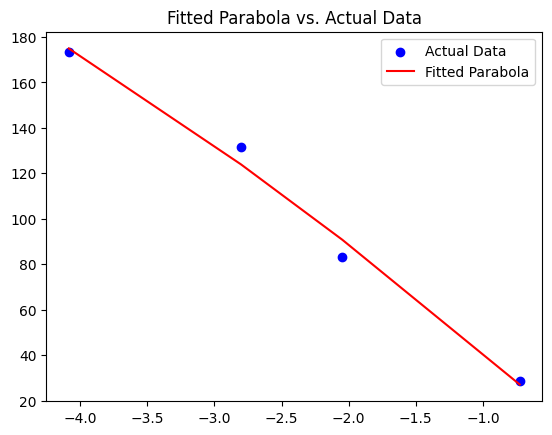

In [ ]:
def fit_parabola_to_trajectory(x_data, y_data):
    # Fit a parabola to y as a function of x
    a, b, c = np.polyfit(x_data, y_data, 2)
    return a, b, c

# Lists to store the fitted parameters
j_coeffs = []
k_coeffs = []
l_coeffs = []

# Iterate over each row in the data
for index in range(len(ball_x_dtl)):
    x_data = ball_x_dtl.iloc[index].values
    y_data = ball_y_dtl.iloc[index].values

    a, b, c = fit_parabola_to_trajectory(x_data, y_data)
    j_coeffs.append(a)
    k_coeffs.append(b)
    l_coeffs.append(c)


def get_predicted_y(a, b, c, x_data):
    return a * x_data**2 + b * x_data + c

residuals_list = []
rmse_list = []

# Iterate over each row in the data
for index in range(len(ball_x_dtl)):
    x_data = ball_x_dtl.iloc[index].values
    y_data = ball_y_dtl.iloc[index].values
    a, b, c = j_coeffs[index], k_coeffs[index], l_coeffs[index]

    y_pred = get_predicted_y(a, b, c, x_data)

    residuals = y_data - y_pred
    residuals_list.append(residuals)

    rmse = np.sqrt(np.mean(residuals**2))
    rmse_list.append(rmse)

import matplotlib.pyplot as plt

# Example: visualize the fit for the 10th swing
index = 9
x_data = ball_x_dtl.iloc[index].values
y_data = ball_y_dtl.iloc[index].values
y_pred = get_predicted_y(j_coeffs[index], k_coeffs[index], l_coeffs[index], x_data)

plt.scatter(x_data, y_data, color='blue', label='Actual Data')
plt.plot(x_data, y_pred, color='red', label='Fitted Parabola')
plt.legend()
plt.title('Fitted Parabola vs. Actual Data')
plt.show()



# Lists to store the speed at each frame
b_d_speed_lists = []

# Iterate over each row in the data
for index in range(len(ball_x_dtl)):
    x_data = ball_x_dtl.iloc[index].values
    a, b = j_coeffs[index], k_coeffs[index]

    speeds = velocity(a, b, x_data)
    b_d_speed_lists.append(speeds)


# Lists to store the interaction terms
ball_interaction_terms_2 = []

# Iterate over each row in the data
for index in range(len(ball_x_dtl)):
    x_data = ball_x_dtl.iloc[index].values
    speeds = b_d_speed_lists[index]

    # Multiply position with constant speed for each frame
    interactions = x_data * speeds
    ball_interaction_terms_2.append(interactions)

In [ ]:
X_4 = sm.add_constant(ball_interaction_terms_2)
y = df_0['carry']

model = sm.OLS(y, X_4).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  carry   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.6024
Date:                Thu, 17 Aug 2023   Prob (F-statistic):              0.662
Time:                        23:06:51   Log-Likelihood:                -319.76
No. Observations:                  93   AIC:                             649.5
Df Residuals:                      88   BIC:                             662.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        178.5704      2.535     70.448      0.0

In [ ]:
# 2. Random Forest:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_test_rf = rf_reg.predict(X_test)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
print(f'Random Forest Test RMSE: {rmse_test_rf}')


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
rf_reg_best = RandomForestRegressor(**best_params, random_state=42)
rf_reg_best.fit(X_train, y_train)
y_pred_test_rf_best = rf_reg_best.predict(X_test)
rmse_test_rf_best = np.sqrt(mean_squared_error(y_test, y_pred_test_rf_best))
print(f'Optimized Random Forest Test RMSE: {rmse_test_rf_best}')

Optimized Random Forest Test RMSE: 8.909058956648932


In [ ]:
X_combined_df_2.columns

Int64Index([0, 1, 0, 0, 1], dtype='int64')

In [ ]:
# X_combined_df_3 = X_combined_df_2.rename(columns={0:"cf_poly_1", 1:"cf_poly_2",  0:"bf_line", 0:"cd_ellipse_1", 1:"cd_ellipse_2"})
# print(X_combined_df_3)

    cd_ellipse_1  cd_ellipse_2  cd_ellipse_1  cd_ellipse_1  cd_ellipse_2
0      13.382496     -1.671906    136.431179  6.416711e+04  3.866724e+04
1       9.315806     -2.912526    144.226661  1.518450e+05  9.903818e+04
2      25.215664     -0.198623    113.420989 -7.406356e+05 -2.172424e+05
3       7.476664     -2.087358    156.862124 -9.533855e+05 -6.771389e+05
4      15.922749     -2.132511    136.618729 -8.622811e+05 -6.151148e+05
..           ...           ...           ...           ...           ...
88      2.021802     -0.155309     85.386333  6.352005e+05  4.300800e+05
89     29.913153      1.104736    134.064977 -2.958099e+06 -2.209180e+06
90      4.256475     -1.408191     81.380322 -8.903871e+05 -6.204913e+05
91     19.998563     -1.257784    132.942863  1.260376e+05  7.842254e+04
92     25.725756      0.041664    143.855640  9.263647e+05  6.493646e+05

[93 rows x 5 columns]


In [ ]:
df_0.head()

,video_id,ball_x_dtl_-5,ball_y_dtl_-5,club_x_dtl_-5,club_y_dtl_-5,ball_dtl_-5_ind,club_dtl_-5_ind,ball_x_face_-5,ball_y_face_-5,club_x_face_-5,...,ball_y_face_6,club_x_face_6,club_y_face_6,ball_face_6_ind,club_face_6_ind,carry,swing_speed,ball_speed,launch_angle,apex
0,1,0,0,92.046895,108.162145,1,1,0,0,411.219944,...,999,-487.131470,113.975945,0,1,167.7,85.4,111.7,16.0,69.3
1,2,0,0,156.944365,188.133840,1,1,0,0,400.117195,...,999,-513.850045,121.146260,0,1,177.7,86.8,116.2,15.8,75.6
2,3,0,0,231.814905,356.211065,1,1,0,0,440.603234,...,999,-468.841435,97.591735,0,1,176.6,88.3,115.7,14.7,68.1
3,4,0,0,242.633895,395.966590,1,1,0,0,400.347230,...,999,-493.985595,120.552350,0,1,176.4,85.3,115.4,16.0,74.8
4,5,0,0,274.963900,449.121545,1,1,0,0,427.198217,...,999,-502.477860,118.961680,0,1,181.7,89.1,118.0,15.1,74.4


In [ ]:
df_main = df_0[['ball_x_dtl_0', 'club_x_face_0', 'ball_x_dtl_5', 'ball_y_dtl_2']]

In [ ]:
df_test = pd.concat([X_combined_df_2, df_main], axis=1)

In [ ]:
df_test

,cf_poly_1,cf_poly_2,bf_line,cd_el_1,cd_el_2,ball_x_dtl_0,club_x_face_0,ball_x_dtl_5,ball_y_dtl_2
0,13.382496,-1.671906,136.431179,6.416711e+04,3.866724e+04,-6.638370,-22.319835,-22.433170,182.183900
1,9.315806,-2.912526,144.226661,1.518450e+05,9.903818e+04,-0.636650,-39.465525,-35.923635,196.980465
2,25.215664,-0.198623,113.420989,-7.406356e+05,-2.172424e+05,-3.732435,-1.530645,-10.177130,135.517830
3,7.476664,-2.087358,156.862124,-9.533855e+05,-6.771389e+05,-0.265260,-41.406385,-1.827390,177.768850
4,15.922749,-2.132511,136.618729,-8.622811e+05,-6.151148e+05,-0.284060,-21.659560,-12.044485,196.995400
...,...,...,...,...,...,...,...,...,...
88,2.021802,-0.155309,85.386333,6.352005e+05,4.300800e+05,-4.102840,-71.120500,-15.209040,250.738880
89,29.913153,1.104736,134.064977,-2.958099e+06,-2.209180e+06,-3.905705,8.999770,-18.537475,227.084475
90,4.256475,-1.408191,81.380322,-8.903871e+05,-6.204913e+05,-10.685185,-62.032380,-45.055625,156.585510
91,19.998563,-1.257784,132.942863,1.260376e+05,7.842254e+04,-3.310180,-13.707160,-22.254940,133.859675


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Linear Regression:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_test = lin_reg.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f'Linear Regression Test MSE: {mse_test}')
print(f'Linear Regression Test RMSE: {rmse_test}')
print(f'Linear Regression Test MAE: {mae_test}')
print(f'Linear Regression Test R2: {r2_test}\n')

# 2. Random Forest:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_test_rf = rf_reg.predict(X_test)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)
print(f'Random Forest Test MSE: {mse_test_rf}')
print(f'Random Forest Test RMSE: {rmse_test_rf}')
print(f'Random Forest Test MAE: {mae_test_rf}')
print(f'Random Forest Test R2: {r2_test_rf}\n')

# 3. Gradient Boosting:
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_test_gb = gb_reg.predict(X_test)
mse_test_gb = mean_squared_error(y_test, y_pred_test_gb)
rmse_test_gb = np.sqrt(mean_squared_error(y_test, y_pred_test_gb))
mae_test_gb = mean_absolute_error(y_test, y_pred_test_gb)
r2_test_gb = r2_score(y_test, y_pred_test_gb)
print(f'Gradient Boosting Test MSE: {mse_test_gb}')
print(f'Gradient Boosting Test RMSE: {rmse_test_gb}')
print(f'Gradient Boosting Test MAE: {mae_test_gb}')
print(f'Gradient Boosting Test R2: {r2_test_gb}')

Linear Regression Test MSE: 53.97411061255235
Linear Regression Test RMSE: 7.346707467468155
Linear Regression Test MAE: 5.77985220259154
Linear Regression Test R2: 0.2778930954779999

Random Forest Test MSE: 69.33679205263182
Random Forest Test RMSE: 8.326871684650353
Random Forest Test MAE: 6.867105263157879
Random Forest Test R2: 0.07235940137997365

Gradient Boosting Test MSE: 59.05919748167971
Gradient Boosting Test RMSE: 7.684998209608101
Gradient Boosting Test MAE: 6.457428150418381
Gradient Boosting Test R2: 0.20986091677940255


In [ ]:
correlations = df_test.corr()

In [ ]:
correlations

,cf_poly_1,cf_poly_2,bf_line,cd_el_1,cd_el_2,ball_x_dtl_0,club_x_face_0,ball_x_dtl_5,ball_y_dtl_2
cf_poly_1,1.000000,0.591724,-0.310402,-0.024345,-0.055442,0.019898,0.983901,-0.138212,-0.131657
cf_poly_2,0.591724,1.000000,-0.359679,0.134911,0.128156,0.115889,0.525360,0.131571,-0.013226
bf_line,-0.310402,-0.359679,1.000000,-0.063946,-0.047297,-0.119211,-0.261341,-0.152925,0.266044
cd_el_1,-0.024345,0.134911,-0.063946,1.000000,0.984009,0.230216,-0.017407,0.212257,-0.052703
cd_el_2,-0.055442,0.128156,-0.047297,0.984009,1.000000,0.250970,-0.047656,0.246119,-0.062484
ball_x_dtl_0,0.019898,0.115889,-0.119211,0.230216,0.250970,1.000000,0.018750,0.695712,-0.400021
club_x_face_0,0.983901,0.525360,-0.261341,-0.017407,-0.047656,0.018750,1.000000,-0.114877,-0.146190
ball_x_dtl_5,-0.138212,0.131571,-0.152925,0.212257,0.246119,0.695712,-0.114877,1.000000,-0.327657
ball_y_dtl_2,-0.131657,-0.013226,0.266044,-0.052703,-0.062484,-0.400021,-0.146190,-0.327657,1.000000


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = df_test.columns
vif_data["VIF"] = [variance_inflation_factor(df_test.values, i) for i in range(df_test.shape[1])]
print(vif_data)

        Variable        VIF
0      cf_poly_1  12.673698
1      cf_poly_2   3.193179
2        bf_line  27.776522
3        cd_el_1  36.420882
4        cd_el_2  36.444783
5   ball_x_dtl_0   2.922712
6  club_x_face_0  11.022021
7   ball_x_dtl_5   4.415288
8   ball_y_dtl_2  18.768987


In [ ]:
df_test_2 = df_test[['cf_poly_2', 'ball_x_dtl_0', 'ball_x_dtl_5']]

In [ ]:
import pandas as pd

# Calculate correlations with 'carry'
correlations = df_0.corr()['carry'].drop('carry')

# Sort by absolute value for better readability (optional)
sorted_correlations = correlations.abs().sort_values(ascending=False)

print(sorted_correlations[:20])

ball_speed        0.980471
apex              0.567579
swing_speed       0.251649
club_y_face_6     0.219177
club_y_face_5     0.210097
ball_y_face_3     0.195996
ball_x_face_3     0.183478
club_y_face_4     0.177915
club_x_face_5     0.161665
ball_x_face_2     0.155195
club_y_face_3     0.144869
club_x_face_4     0.144061
club_x_face_6     0.139904
ball_x_dtl_0      0.139003
ball_y_face_2     0.130955
ball_y_dtl_1      0.127975
club_x_face_3     0.123786
club_y_face_-1    0.119379
ball_x_face_1     0.109016
ball_y_dtl_2      0.103539
Name: carry, dtype: float64


In [ ]:
final_df_3 = df_0[['club_y_face_6', 'club_y_face_5', 'ball_y_face_3', 'ball_x_face_3', 'club_y_face_4', 'club_x_face_5', 'ball_x_face_2']]
print(final_df_3)

    club_y_face_6  club_y_face_5  ball_y_face_3  ball_x_face_3  club_y_face_4  \
0      113.975945      81.596635     135.199570    -463.658955      53.306770   
1      121.146260      85.010495     145.853210    -510.230525      55.295230   
2       97.591735      68.647350     113.754650    -440.987065      42.331775   
3      120.552350      85.328350     156.671800    -502.587955      56.492680   
4      118.961680      82.540850     135.794225    -480.767580      52.262335   
..            ...            ...            ...            ...            ...   
88     162.775375     118.489275      45.723275    -327.046150      81.094495   
89     122.602960      83.595530     133.628950    -441.389270      52.736980   
90     142.448590     102.923440      36.561750    -316.179950      69.654160   
91     141.104825      99.931170     132.325325    -490.378060      65.126700   
92     114.351165      80.952050     142.674400    -450.767760      51.870170   

    club_x_face_5  ball_x_f

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Splitting data
features = ['cf_poly_2', 'ball_x_dtl_0', 'ball_x_dtl_5']
X = df_test[features]
y = df_0['carry']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Predicting
y_pred = lm.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

RMSE: 8.64912824369965
R^2: -0.0008308321859209489


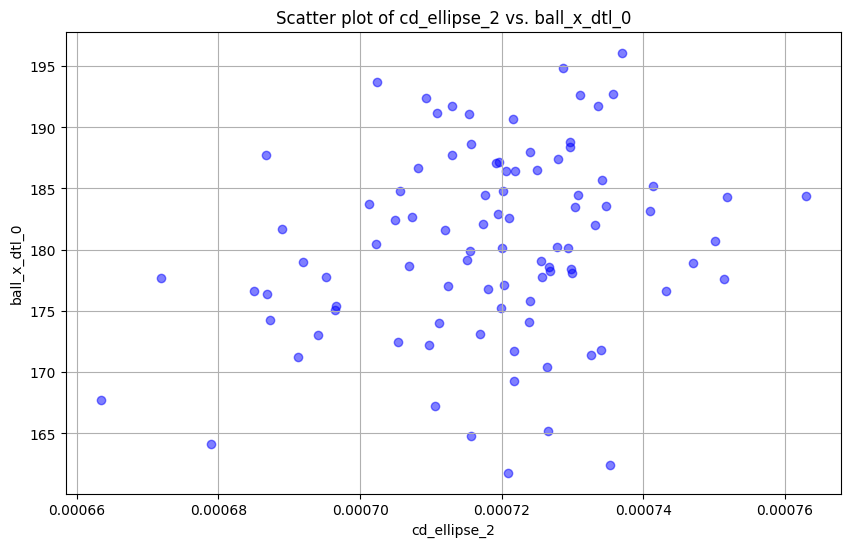

In [ ]:
import matplotlib.pyplot as plt

# Extract data for the two variables
x_data = a_coeffs
y_data = df_0['carry']

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(x_data, y_data, color='blue', alpha=0.5)  # alpha controls the transparency of the points

# Add title and labels
plt.title('Scatter plot of cd_ellipse_2 vs. ball_x_dtl_0')
plt.xlabel('cd_ellipse_2')
plt.ylabel('ball_x_dtl_0')

# Display the plot
plt.grid(True)  # Add a grid for better readability
plt.show()

In [ ]:
correlation_matrix = np.corrcoef(df_0[], df_0['carry'])
correlation_value = correlation_matrix[0, 1]

print("Correlation Value:", correlation_value)

Correlation Value: 0.04167357085903534


In [ ]:
df_0['carry'][:20]

0     167.7
1     177.7
2     176.6
3     176.4
4     181.7
5     171.7
6     187.7
7     164.1
8     179.9
9     179.2
10    173.0
11    161.8
12    184.8
13    177.8
14    171.2
15    179.0
16    193.7
17    182.6
18    187.2
19    187.7
Name: carry, dtype: float64

In [ ]:
import numpy as np

# Extracting the first item from each array in speed_lists
cf_speeds = [speeds[9] for speeds in c_f_speed_lists]

# Using numpy to compute the correlation
correlation_matrix = np.corrcoef(cf_speeds, df_0['carry'])
correlation_value = correlation_matrix[0, 1]

print("Correlation Value:", correlation_value)

Correlation Value: -0.2559422790714876


In [ ]:
import numpy as np

# Extracting the first item from each array in speed_lists
# seven_speeds = [speeds[7] for speeds in speed_lists]


# # eight_speeds = [speeds[8] for speeds in speed_lists]
# # nine_speeds = [speeds[9] for speeds in speed_lists]
# # ten_speeds = [speeds[10] for speeds in speed_lists]
# eleven_speeds = [speeds[11] for speeds in speed_lists]

# me = median

# Extracting and averaging the speeds for indices 7 through 11
cf_average_speeds = [np.mean(speeds[8:12]) for speeds in c_f_speed_lists]


# Using numpy to compute the correlation
correlation_matrix = np.corrcoef(cf_average_speeds, df_0['carry'])
correlation_value = correlation_matrix[0, 1]

print("Correlation Value:", correlation_value)

Correlation Value: -0.2714206865737163


In [ ]:
averaged_list = [(x + y) / 2 for x, y in zip(a_coeffs, c_coeffs)]

In [ ]:
# Using numpy to compute the correlation
correlation_matrix = np.corrcoef(averaged_list, df_0['carry'])
correlation_value = correlation_matrix[0, 1]

print("Correlation Value:", correlation_value)

Correlation Value: -0.13980135134935023


In [ ]:
speed_lists

[array([ 0.65015076,  0.55042834,  0.43999659,  0.31939458,  0.19539665,
         0.07490676, -0.0365145 , -0.14750409, -0.25316504, -0.35584251,
        -0.45305498, -0.54183043]),
 array([ 0.66455299,  0.56187418,  0.44812484,  0.3223681 ,  0.19203169,
         0.07379924, -0.04476534, -0.15492105, -0.26449435, -0.36856176,
        -0.46949163, -0.56372453]),
 array([ 0.73551991,  0.63510229,  0.52117221,  0.39560499,  0.26314669,
         0.12976427,  0.01886839, -0.10353779, -0.21297216, -0.31544368,
        -0.41475448, -0.51048557]),
 array([ 0.65723034,  0.55099526,  0.43006067,  0.30428573,  0.16831031,
         0.05041151, -0.06156198, -0.17468965, -0.28081476, -0.38200963,
        -0.48036414, -0.571278  ]),
 array([ 0.7169964 ,  0.61477186,  0.49497569,  0.36452329,  0.2255751 ,
         0.09845588, -0.02009207, -0.14084298, -0.25466032, -0.3643399 ,
        -0.46868228, -0.56412728]),
 array([ 0.75058743,  0.6428687 ,  0.51781748,  0.38221612,  0.2385483 ,
         0.098270

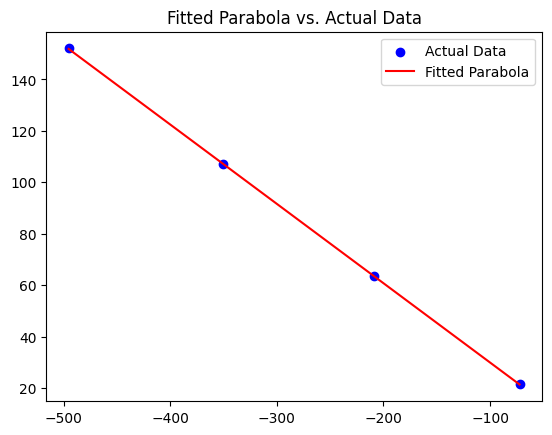

In [ ]:
def fit_parabola_to_trajectory(x_data, y_data):
    # Fit a parabola to y as a function of x
    # a, b, c = np.polyfit(x_data, y_data, 2)
    # return a, b, c
    m, c = np.polyfit(x_data, y_data, 1)
    return m, c

# Lists to store the fitted parameters
d_coeffs = []
e_coeffs = []

# Iterate over each row in the data
for index in range(len(ball_x_face)):
    x_data = ball_x_face.iloc[index].values
    y_data = ball_y_face.iloc[index].values

    m, c = fit_parabola_to_trajectory(x_data, y_data)
    d_coeffs.append(m)
    e_coeffs.append(c)


def get_predicted_y(m, c, x_data): #a, b, c, x_data):
    return m * x_data + c

residuals_list = []
rmse_list = []

# Iterate over each row in the data
for index in range(len(ball_x_face)):
    x_data = ball_x_face.iloc[index].values
    y_data = ball_y_face.iloc[index].values
    m, c = d_coeffs[index], e_coeffs[index]  #, f_coeffs[index]

    y_pred = get_predicted_y(m, c, x_data)

    residuals = y_data - y_pred
    residuals_list.append(residuals)

    rmse = np.sqrt(np.mean(residuals**2))
    rmse_list.append(rmse)

import matplotlib.pyplot as plt

# Example: visualize the fit for the 10th swing
index = 9
x_data = ball_x_face.iloc[index].values
y_data = ball_y_face.iloc[index].values
y_pred = get_predicted_y(d_coeffs[index], e_coeffs[index], x_data)

plt.scatter(x_data, y_data, color='blue', label='Actual Data')
plt.plot(x_data, y_pred, color='red', label='Fitted Parabola')
plt.legend()
plt.title('Fitted Parabola vs. Actual Data')
plt.show()


b_f_speed_lists = []

for index in range(len(ball_x_face)):
    m = d_coeffs[index]  # Slope represents the speed for a linear fit
    speeds = [m] * len(ball_x_face.iloc[index].values)  # Constant speed for each frame
    b_f_speed_lists.append(speeds)



In [ ]:
b_f_speed_lists

In [ ]:
# Using numpy to compute the correlation
correlation_matrix = np.corrcoef(e_coeffs, df_0['carry'])
correlation_value = correlation_matrix[0, 1]

print("Correlation Value:", correlation_value)

Correlation Value: -0.11419815428189102


In [ ]:
# Extracting the first item from each array in speed_lists
bf_speeds = [speeds[3] for speeds in b_f_speed_lists]

# Using numpy to compute the correlation
correlation_matrix = np.corrcoef(bf_speeds, df_0['carry'])
correlation_value = correlation_matrix[0, 1]

print("Correlation Value:", correlation_value)

Correlation Value: 0.03468232898377105


In [ ]:
# Extracting and averaging the speeds for indices 7 through 11
cf_average_speeds = [np.mean(speeds[8:12]) for speeds in c_f_speed_lists]


# Using numpy to compute the correlation
correlation_matrix = np.corrcoef(cf_average_speeds, df_0['carry'])
correlation_value = correlation_matrix[0, 1]

print("Correlation Value:", correlation_value)

In [ ]:
# Using numpy to compute the correlation
correlation_matrix = np.corrcoef(averaged_list, df_0['carry'])
correlation_value = correlation_matrix[0, 1]

print("Correlation Value:", correlation_value)

Correlation Value: -0.13980135134935023


In [ ]:
averaged_list = [(x + y + z) / 3 for x, y, z in zip(d_coeffs, e_coeffs, f_coeffs)]

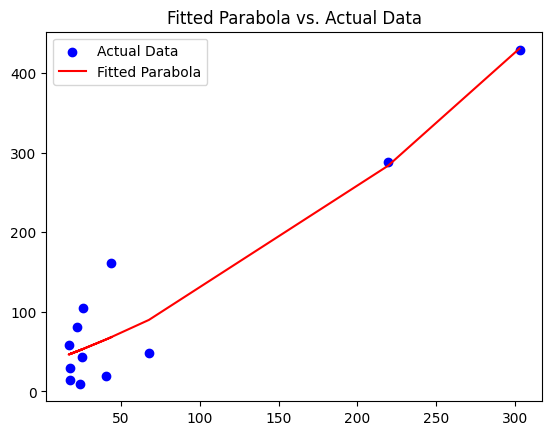

In [ ]:
def fit_parabola_to_trajectory(x_data, y_data):
    # Fit a parabola to y as a function of x
    a, b, c = np.polyfit(x_data, y_data, 2)
    return a, b, c

# Lists to store the fitted parameters
g_coeffs = []
h_coeffs = []
i_coeffs = []

# Iterate over each row in the data
for index in range(len(club_x_dtl)):
    x_data = club_x_dtl.iloc[index].values
    y_data = club_y_dtl.iloc[index].values

    a, b, c = fit_parabola_to_trajectory(x_data, y_data)
    g_coeffs.append(a)
    h_coeffs.append(b)
    i_coeffs.append(c)


def get_predicted_y(a, b, c, x_data):
    return a * x_data**2 + b * x_data + c

residuals_list = []
rmse_list = []

# Iterate over each row in the data
for index in range(len(club_x_dtl)):
    x_data = club_x_dtl.iloc[index].values
    y_data = club_y_dtl.iloc[index].values
    a, b, c = g_coeffs[index], h_coeffs[index], i_coeffs[index]

    y_pred = get_predicted_y(a, b, c, x_data)

    residuals = y_data - y_pred
    residuals_list.append(residuals)

    rmse = np.sqrt(np.mean(residuals**2))
    rmse_list.append(rmse)

import matplotlib.pyplot as plt

# Example: visualize the fit for the 10th swing
index = 9
x_data = club_x_dtl.iloc[index].values
y_data = club_y_dtl.iloc[index].values
y_pred = get_predicted_y(g_coeffs[index], h_coeffs[index], i_coeffs[index], x_data)

plt.scatter(x_data, y_data, color='blue', label='Actual Data')
plt.plot(x_data, y_pred, color='red', label='Fitted Parabola')
plt.legend()
plt.title('Fitted Parabola vs. Actual Data')
plt.show()


# Lists to store the speed at each frame
c_d_speed_lists = []

# Iterate over each row in the data
for index in range(len(club_x_dtl)):
    x_data = club_x_dtl.iloc[index].values
    a, b = g_coeffs[index], h_coeffs[index]

    speeds = velocity(a, b, x_data)
    c_d_speed_lists.append(speeds)

In [ ]:
# Extracting the first item from each array in speed_lists
c_d_speeds = [speeds[9] for speeds in c_d_speed_lists]

#average_speeds = [np.mean(speeds[[0,2,3]]) for speeds in b_f_speed_lists]

# Using numpy to compute the correlation
correlation_matrix = np.corrcoef(c_d_speeds, df_0['carry'])
correlation_value = correlation_matrix[0, 1]

print("Correlation Value:", correlation_value)

Correlation Value: 0.010576418364093934


In [ ]:
club_x_dtl.iloc[index].values

array([231.550565, 162.312685, 109.9275  ,  69.221955,  40.6406  ,
        13.961665,  19.21875 ,  24.95496 ,  31.10562 ,  41.13373 ,
        52.154725,  65.683105])

In [ ]:
club_y_dtl.iloc[index].values

array([467.73901 , 313.79545 , 191.86175 , 102.84168 ,  49.73833 ,
         9.64953 ,  23.046075,  42.84178 ,  61.78393 ,  91.06811 ,
       120.29626 , 154.025625])

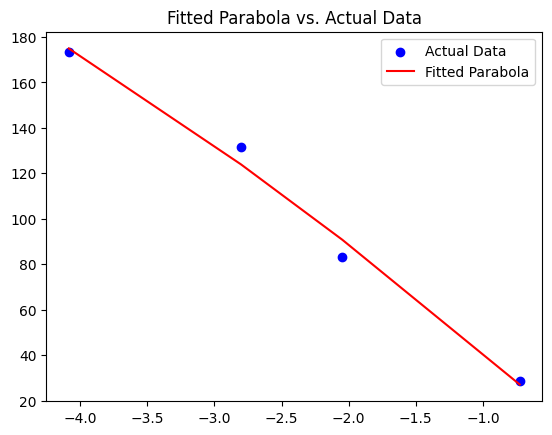

In [ ]:
def fit_parabola_to_trajectory(x_data, y_data):
    # Fit a parabola to y as a function of x
    a, b, c = np.polyfit(x_data, y_data, 2)
    return a, b, c

# Lists to store the fitted parameters
j_coeffs = []
k_coeffs = []
l_coeffs = []

# Iterate over each row in the data
for index in range(len(ball_x_dtl)):
    x_data = ball_x_dtl.iloc[index].values
    y_data = ball_y_dtl.iloc[index].values

    a, b, c = fit_parabola_to_trajectory(x_data, y_data)
    j_coeffs.append(a)
    k_coeffs.append(b)
    l_coeffs.append(c)


def get_predicted_y(a, b, c, x_data):
    return a * x_data**2 + b * x_data + c

residuals_list = []
rmse_list = []

# Iterate over each row in the data
for index in range(len(ball_x_dtl)):
    x_data = ball_x_dtl.iloc[index].values
    y_data = ball_y_dtl.iloc[index].values
    a, b, c = j_coeffs[index], k_coeffs[index], l_coeffs[index]

    y_pred = get_predicted_y(a, b, c, x_data)

    residuals = y_data - y_pred
    residuals_list.append(residuals)

    rmse = np.sqrt(np.mean(residuals**2))
    rmse_list.append(rmse)

import matplotlib.pyplot as plt

# Example: visualize the fit for the 10th swing
index = 9
x_data = ball_x_dtl.iloc[index].values
y_data = ball_y_dtl.iloc[index].values
y_pred = get_predicted_y(j_coeffs[index], k_coeffs[index], l_coeffs[index], x_data)

plt.scatter(x_data, y_data, color='blue', label='Actual Data')
plt.plot(x_data, y_pred, color='red', label='Fitted Parabola')
plt.legend()
plt.title('Fitted Parabola vs. Actual Data')
plt.show()



# Lists to store the speed at each frame
b_d_speed_lists = []

# Iterate over each row in the data
for index in range(len(ball_x_dtl)):
    x_data = ball_x_dtl.iloc[index].values
    a, b = j_coeffs[index], k_coeffs[index]

    speeds = velocity(a, b, x_data)
    b_d_speed_lists.append(speeds)

In [ ]:
# Extracting the first item from each array in speed_lists
b_d_speeds = [speeds[1] for speeds in b_d_speed_lists]

#average_speeds = [np.mean(speeds[[0,2,3]]) for speeds in b_f_speed_lists]

# Using numpy to compute the correlation
correlation_matrix = np.corrcoef(b_d_speeds, df_0['carry'])
correlation_value = correlation_matrix[0, 1]

print("Correlation Value:", correlation_value)

Correlation Value: -0.15956243148564037


In [ ]:
# Extracting the first item from each array in speed_lists
cd_speeds = [speeds[3] for speeds in c_d_speed_lists]

#average_speeds = [np.mean(speeds[[0,2,3]]) for speeds in b_f_speed_lists]

# Using numpy to compute the correlation
correlation_matrix = np.corrcoef(c_d_speeds, df_0['carry'])
correlation_value = correlation_matrix[0, 1]

print("Correlation Value:", correlation_value)

Correlation Value: 0.010576418364093934


In [ ]:
# Using numpy to compute the correlation
correlation_matrix = np.corrcoef(l_coeffs, df_0['carry'])
correlation_value = correlation_matrix[0, 1]

print("Correlation Value:", correlation_value)

Correlation Value: 0.04984790313784511


In [ ]:
averaged_list = [(x + y + z) / 3 for x, y, z in zip(d_coeffs, e_coeffs, f_coeffs)]

In [ ]:
average_speeds = [np.mean(speeds[10:12]) for speeds in speed_lists]

In [ ]:
len(l_coeffs)

84

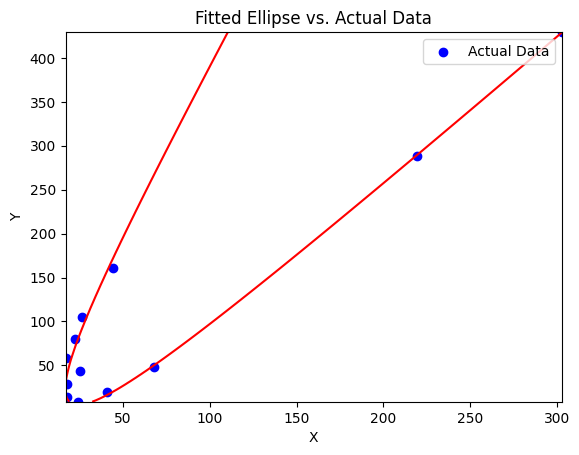

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fit_ellipse(x, y):
    # Design matrix
    D = np.vstack([x**2, x*y, y**2, x, y, np.ones_like(x)]).T

    # Scatter matrix
    S = np.dot(D.T, D)

    # Constraint matrix
    C = np.zeros([6, 6])
    C[0, 2] = 2
    C[2, 0] = 2
    C[1, 1] = -1

    # Solve generalized eigenproblem
    evals, evecs = np.linalg.eig(np.linalg.inv(S).dot(C))

    # Find the positive eigenvalue
    idx = np.argmax(np.abs(evals))
    a = evecs[:, idx]

    return a

# Your data
x = np.array([302.833025, 219.41592 , 67.760625, 40.793105, 23.932815,
              17.575695, 17.58723 , 25.29954 , 16.851325, 22.45435 ,
              26.056015, 43.89155 ])
y = np.array([429.35645 , 288.01725 , 47.91175 , 19.66895 , 8.67444 ,
              14.243535, 29.04683 , 43.72034 , 58.8564 , 80.54425 ,
              104.881 , 160.79738 ])

# Fit the ellipse
a = fit_ellipse(x, y)

# To visualize the fit, we'll need to generate a grid of points and evaluate the ellipse equation
xx, yy = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))
zz = a[0] * xx**2 + a[1] * xx * yy + a[2] * yy**2 + a[3] * xx + a[4] * yy + a[5]

# Plot the actual points and the contour of the ellipse
plt.scatter(x, y, color='blue', label='Actual Data')
plt.contour(xx, yy, zz, levels=[0], colors='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Fitted Ellipse vs. Actual Data')
plt.show()

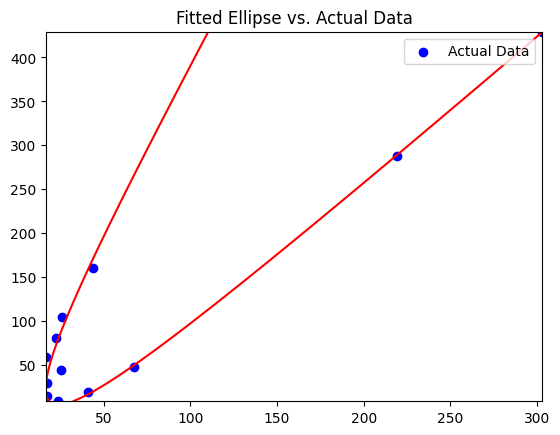

KeyError: ignored

In [ ]:
def fit_ellipse(x, y):
    # Design matrix
    D = np.vstack([x**2, x*y, y**2, x, y, np.ones_like(x)]).T

    # Scatter matrix
    S = np.dot(D.T, D)

    # Constraint matrix
    C = np.zeros([6, 6])
    C[0, 2] = 2
    C[2, 0] = 2
    C[1, 1] = -1

    # Solve generalized eigenproblem
    evals, evecs = np.linalg.eig(np.linalg.inv(S).dot(C))

    # Find the positive eigenvalue
    idx = np.argmax(np.abs(evals))
    a = evecs[:, idx]

    return a

# Lists to store the fitted ellipse coefficients
coeffs_list = []

# Iterate over each row in the data
for index in range(len(club_x_dtl)):
    x_data = club_x_dtl.iloc[index].values
    y_data = club_y_dtl.iloc[index].values

    coeffs = fit_ellipse(x_data, y_data)
    coeffs_list.append(coeffs)

# Example: visualize the fit for the 10th swing
index = 9
x_data = club_x_dtl.iloc[index].values
y_data = club_y_dtl.iloc[index].values
coeffs = coeffs_list[index]

xx, yy = np.meshgrid(np.linspace(x_data.min(), x_data.max(), 1000), np.linspace(y_data.min(), y_data.max(), 1000))
zz = coeffs[0] * xx**2 + coeffs[1] * xx * yy + coeffs[2] * yy**2 + coeffs[3] * xx + coeffs[4] * yy + coeffs[5]

plt.scatter(x_data, y_data, color='blue', label='Actual Data')
plt.contour(xx, yy, zz, levels=[0], colors='red')
plt.legend()
plt.title('Fitted Ellipse vs. Actual Data')
plt.show()


def calculate_speeds(x_data, y_data):
    speeds = []
    for i in range(1, len(x_data)):
        distance = np.sqrt((x_data[i] - x_data[i-1])**2 + (y_data[i] - y_data[i-1])**2)

        # Assuming constant time difference of 1 between points
        speed = distance
        speeds.append(speed)
    return speeds

# Calculate speeds for the 10th swing as an example
speeds_10th_swing = calculate_speeds(club_x_dtl, club_y_dtl)

In [ ]:
len(coeffs)

93

In [ ]:
speeds_10th_swing

[164.1194164723389,
 283.9894005623925,
 39.05000495250161,
 20.128304176561915,
 8.45149654282749,
 14.8032994941415,
 16.57683990560927,
 17.334146907472114,
 22.399926936780957,
 24.601816829956377,
 58.69197441763759]

In [ ]:
#coeffs = [speeds[1] for speeds in coeffs_list]

correlation_matrix = np.corrcoef(h_coeffs, df_0['carry'])
correlation_value = correlation_matrix[0, 1]

print("Correlation Value:", correlation_value)

Correlation Value: 0.17282509582663597


In [ ]:
# Extracting the first item from each array in speed_lists
c_d_speeds = [speeds[6] for speeds in c_d_speed_lists]

average_speeds = [np.mean(speeds[[3,4,5, 6]]) for speeds in c_d_speed_lists]

# Using numpy to compute the correlation
correlation_matrix = np.corrcoef(average_speeds, df_0['carry'])
correlation_value = correlation_matrix[0, 1]

print("Correlation Value:", correlation_value)

Correlation Value: 0.173748571073493


In [ ]:
# Using numpy to compute the correlation
correlation_matrix = np.corrcoef(l_coeffs, df_0['carry'])
correlation_value = correlation_matrix[0, 1]

print("Correlation Value:", correlation_value)

Correlation Value: 0.04984790313784511


In [ ]:
averaged_list = [(x + y + z) / 3 for x, y, z in zip(d_coeffs, e_coeffs, f_coeffs)]

In [ ]:
average_speeds = [np.mean(speeds[10:12]) for speeds in speed_lists]

In [ ]:
pred_vars = df_0.iloc[:, -5:]
print(pred_vars)

    carry  swing_speed  ball_speed  launch_angle   apex
0   167.7         85.4       111.7          16.0   69.3
1   177.7         86.8       116.2          15.8   75.6
2   176.6         88.3       115.7          14.7   68.1
3   176.4         85.3       115.4          16.0   74.8
4   181.7         89.1       118.0          15.1   74.4
..    ...          ...         ...           ...    ...
88  196.1         93.7       125.8          16.7   99.8
89  194.8         92.5       124.3          15.7   89.7
90  192.4         89.7       123.9          17.7  101.6
91  192.6         94.7       124.3          16.8   97.8
92  192.7         86.9       122.8          16.7   92.1

[93 rows x 5 columns]


In [ ]:
df_0

,video_id,ball_x_dtl_-5,ball_y_dtl_-5,club_x_dtl_-5,club_y_dtl_-5,ball_dtl_-5_ind,club_dtl_-5_ind,ball_x_face_-5,ball_y_face_-5,club_x_face_-5,...,ball_y_face_6,club_x_face_6,club_y_face_6,ball_face_6_ind,club_face_6_ind,carry,swing_speed,ball_speed,launch_angle,apex
0,1,0,0,92.046895,108.162145,1,1,0,0,411.219944,...,999,-487.131470,113.975945,0,1,167.7,85.4,111.7,16.0,69.3
1,2,0,0,156.944365,188.133840,1,1,0,0,400.117195,...,999,-513.850045,121.146260,0,1,177.7,86.8,116.2,15.8,75.6
2,3,0,0,231.814905,356.211065,1,1,0,0,440.603234,...,999,-468.841435,97.591735,0,1,176.6,88.3,115.7,14.7,68.1
3,4,0,0,242.633895,395.966590,1,1,0,0,400.347230,...,999,-493.985595,120.552350,0,1,176.4,85.3,115.4,16.0,74.8
4,5,0,0,274.963900,449.121545,1,1,0,0,427.198217,...,999,-502.477860,118.961680,0,1,181.7,89.1,118.0,15.1,74.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,0,0,183.037055,295.180925,1,1,0,0,398.935155,...,999,-526.371200,162.775375,0,1,196.1,93.7,125.8,16.7,99.8
89,90,0,0,356.765185,544.138600,1,1,0,0,456.684549,...,999,-483.258350,122.602960,0,1,194.8,92.5,124.3,15.7,89.7
90,91,0,0,244.085505,394.008425,1,1,0,0,406.110480,...,999,-514.935150,142.448590,0,1,192.4,89.7,123.9,17.7,101.6
91,92,0,0,126.686575,193.071150,1,1,0,0,451.611033,...,999,-505.708195,141.104825,0,1,192.6,94.7,124.3,16.8,97.8


In [ ]:
coeffs_list = pd.DataFrame(data=coeffs_list, columns=["C1", "C2", "C3", "C4", "C5", "C6"])
print(coeffs_list)

          C1        C2        C3        C4        C5        C6
0   0.006564 -0.008982  0.002769  0.004742  0.014648 -0.999816
1   0.009311 -0.010496  0.002828 -0.194933  0.050595  0.979406
2  -0.008094  0.009793 -0.003016  0.153956 -0.072044 -0.985361
3  -0.005706  0.005904 -0.001575  0.114757 -0.028379 -0.992953
4  -0.011680  0.012643 -0.003459  0.146555 -0.044702 -0.988036
..       ...       ...       ...       ...       ...       ...
79  0.004053 -0.003654  0.000797 -0.147741  0.061046  0.987125
80 -0.002974  0.002941 -0.000747  0.083986 -0.000169 -0.996458
81 -0.006399  0.006351 -0.001624  0.106714 -0.007492 -0.994219
82  0.012628 -0.012309  0.002899 -0.242903  0.102412  0.964464
83  0.005974 -0.005198  0.001145 -0.143625  0.052802  0.988190

[84 rows x 6 columns]


In [ ]:
type(a_coeffs)

list

In [ ]:
final_df_ = pd.DataFrame(data=pd.concat([pd.DataFrame(data=a_coeffs, columns=['cf_a']), pd.DataFrame(data=cf_speeds, columns=['cf_speed']),
                                          pd.DataFrame(data=d_coeffs, columns=['bf_d']), pd.DataFrame(data=bf_speeds, columns=['bf_speed']),
                                          pd.DataFrame(data=h_coeffs, columns=['cd_h']), pd.DataFrame(data=cd_speeds, columns=['cd_speed']),
                                          pd.DataFrame(data=k_coeffs, columns=['bd_k']), pd.DataFrame(data=b_d_speeds, columns=['bd_speed'])
                                          ], axis=1))     #  .reset_index()

In [ ]:
final_df_

,cf_a,cf_speed,bf_d,bf_speed,cd_h,cd_speed,bd_k,bd_speed
0,0.000663,-0.541830,0.000018,-0.296626,0.621271,0.920440,-19.961146,-15.078033
1,0.000672,-0.563725,0.000042,-0.288338,2.717278,2.066614,-5.715763,-7.050545
2,0.000685,-0.510486,0.000032,-0.261445,1.837642,1.787898,-14.373007,-24.755351
3,0.000687,-0.571278,0.000011,-0.313546,1.751209,1.684907,69.478344,91.696813
4,0.000689,-0.564127,0.000020,-0.286861,2.189811,2.088524,-15.630930,-28.399531
...,...,...,...,...,...,...,...,...
88,0.000737,-0.668907,0.001046,-0.583175,3.239559,2.539310,-25.452739,-23.880437
89,0.000729,-0.594586,0.000003,-0.304088,1.961184,1.872321,-22.217566,-19.116590
90,0.000709,-0.619762,0.001169,-0.618755,1.900478,1.839581,-6.792549,-6.347017
91,0.000731,-0.627573,0.000006,-0.271990,2.794783,2.337581,-8.789267,-10.339070


In [ ]:
pd.DataFrame(data=[a_coeffs, cf_speeds])

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,0.000663,0.000672,0.000685,0.000687,0.000689,0.000722,0.000687,0.000679,0.000715,0.000715,...,0.000747,0.000727,0.000734,0.000726,0.000724,0.000737,0.000729,0.000709,0.000731,0.000736
1,-0.541830,-0.563725,-0.510486,-0.571278,-0.564127,-0.553282,-0.552163,-0.610630,-0.545235,-0.548364,...,-0.580444,-0.551692,-0.619688,-0.642545,-0.646788,-0.668907,-0.594586,-0.619762,-0.627573,-0.579117


In [ ]:
club_face_parab = pd.DataFrame(data=pd.concat([pd.DataFrame(data=a_coeffs, columns=['c_f_a']), pd.DataFrame(data=b_coeffs, columns=['c_f_b']),
                                   pd.DataFrame(data=c_coeffs, columns=['c_f_c'])], axis=1)).reset_index()

In [ ]:
ball_face_parab = pd.DataFrame(data=pd.concat([pd.DataFrame(data=d_coeffs, columns=['b_f_d']), pd.DataFrame(data=e_coeffs, columns=['b_f_e']),
                                   pd.DataFrame(data=f_coeffs, columns=['b_f_f'])], axis=1)).reset_index()

In [ ]:
ball_dtl_parab = pd.DataFrame(data=pd.concat([pd.DataFrame(data=j_coeffs, columns=['b_d_j']), pd.DataFrame(data=k_coeffs, columns=['b_d_k']),
                                   pd.DataFrame(data=l_coeffs, columns=['b_d_l'])], axis=1)).reset_index()

In [ ]:
pred_vars = pred_vars           #.reset_index()

In [ ]:
final_df_2 = pd.concat([final_df_, pred_vars], axis=1)

In [ ]:
final_df_2

,cf_a,cf_speed,bf_d,bf_speed,cd_h,cd_speed,bd_k,bd_speed,index,carry,swing_speed,ball_speed,launch_angle,apex
0,0.000663,-0.541830,0.000018,-0.296626,0.621271,0.920440,-19.961146,-15.078033,0,167.7,85.4,111.7,16.0,69.3
1,0.000672,-0.563725,0.000042,-0.288338,2.717278,2.066614,-5.715763,-7.050545,1,177.7,86.8,116.2,15.8,75.6
2,0.000685,-0.510486,0.000032,-0.261445,1.837642,1.787898,-14.373007,-24.755351,2,176.6,88.3,115.7,14.7,68.1
3,0.000687,-0.571278,0.000011,-0.313546,1.751209,1.684907,69.478344,91.696813,3,176.4,85.3,115.4,16.0,74.8
4,0.000689,-0.564127,0.000020,-0.286861,2.189811,2.088524,-15.630930,-28.399531,4,181.7,89.1,118.0,15.1,74.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.000737,-0.668907,0.001046,-0.583175,3.239559,2.539310,-25.452739,-23.880437,88,196.1,93.7,125.8,16.7,99.8
89,0.000729,-0.594586,0.000003,-0.304088,1.961184,1.872321,-22.217566,-19.116590,89,194.8,92.5,124.3,15.7,89.7
90,0.000709,-0.619762,0.001169,-0.618755,1.900478,1.839581,-6.792549,-6.347017,90,192.4,89.7,123.9,17.7,101.6
91,0.000731,-0.627573,0.000006,-0.271990,2.794783,2.337581,-8.789267,-10.339070,91,192.6,94.7,124.3,16.8,97.8


In [ ]:
final_df = pd.concat([coeffs_list, club_face_parab, ball_face_parab, ball_dtl_parab, pred_vars], axis=1)
final_df

,C1,C2,C3,C4,C5,C6,index,c_f_a,c_f_b,c_f_c,...,index,b_d_j,b_d_k,b_d_l,index,carry,swing_speed,ball_speed,launch_angle,apex
0,0.006564,-0.008982,0.002769,0.004742,0.014648,-0.999816,0,0.000663,0.104522,9.149958,...,0,-0.254800,-19.961146,-19.575155,0,167.7,85.4,111.7,16.0,69.3
1,0.009311,-0.010496,0.002828,-0.194933,0.050595,0.979406,1,0.000672,0.126837,10.502367,...,1,0.073131,-5.715763,17.332402,1,177.7,86.8,116.2,15.8,75.6
2,-0.008094,0.009793,-0.003016,0.153956,-0.072044,-0.985361,2,0.000685,0.131861,11.334607,...,2,1.315985,-14.373007,-3.581045,2,176.6,88.3,115.7,14.7,68.1
3,-0.005706,0.005904,-0.001575,0.114757,-0.028379,-0.992953,3,0.000687,0.107290,6.829245,...,3,179.499672,69.478344,154.015135,3,176.4,85.3,115.4,16.0,74.8
4,-0.011680,0.012643,-0.003459,0.146555,-0.044702,-0.988036,4,0.000689,0.128303,10.365991,...,4,0.934642,-15.630930,18.196816,4,181.7,89.1,118.0,15.1,74.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.004053,-0.003654,0.000797,-0.147741,0.061046,0.987125,79,0.000737,0.107023,7.234038,...,79,-0.124258,-25.452739,-6.051981,88,196.1,93.7,125.8,16.7,99.8
80,-0.002974,0.002941,-0.000747,0.083986,-0.000169,-0.996458,80,0.000729,0.109637,7.616996,...,80,-0.242851,-22.217566,-27.351989,89,194.8,92.5,124.3,15.7,89.7
81,-0.006399,0.006351,-0.001624,0.106714,-0.007492,-0.994219,81,0.000709,0.110697,6.997184,...,81,-0.011870,-6.792549,-15.307253,90,192.4,89.7,123.9,17.7,101.6
82,0.012628,-0.012309,0.002899,-0.242903,0.102412,0.964464,82,0.000731,0.111802,10.730590,...,82,0.092167,-8.789267,7.398305,91,192.6,94.7,124.3,16.8,97.8


In [ ]:
#final_df.to_csv("/content/drive/MyDrive/GolfDB/swing_video_files/launch_models/final_df.csv")

In [ ]:
len(coeffs_list)

84

In [ ]:
pd.DataFrame(list(map(np.ravel, coeffs_list)))

,0,1,2,3,4,5
0,0.006564,-0.008982,0.002769,0.004742,0.014648,-0.999816
1,0.009311,-0.010496,0.002828,-0.194933,0.050595,0.979406
2,-0.008094,0.009793,-0.003016,0.153956,-0.072044,-0.985361
3,-0.005706,0.005904,-0.001575,0.114757,-0.028379,-0.992953
4,-0.011680,0.012643,-0.003459,0.146555,-0.044702,-0.988036
...,...,...,...,...,...,...
88,0.004053,-0.003654,0.000797,-0.147741,0.061046,0.987125
89,-0.002974,0.002941,-0.000747,0.083986,-0.000169,-0.996458
90,-0.006399,0.006351,-0.001624,0.106714,-0.007492,-0.994219
91,0.012628,-0.012309,0.002899,-0.242903,0.102412,0.964464


In [ ]:
import numpy as np

def fit_parabola_to_trajectory(x_data, y_data):
    # Fit a parabola to y as a function of x
    a, b, c = np.polyfit(x_data, y_data, 2)
    return a, b, c

# Lists to store the fitted parameters
club_x_face_a_coeffs = []
club_x_face_b_coeffs = []
club_x_face_c_coeffs = []

# Iterate over each row in the data
for index in range(len(club_x_face)):
    club_x_face_x_data = club_x_face.iloc[index].values
    club_x_face_y_data = club_y_face.iloc[index].values

    a, b, c = fit_parabola_to_trajectory(x_data, y_data)
    club_x_face_a_coeffs.append(a)
    club_x_face_b_coeffs.append(b)
    club_x_face_c_coeffs.append(c)

In [ ]:
def get_predicted_y(a, b, c, x_data):
    return a * x_data**2 + b * x_data + c

club_x_face_residuals_list = []
club_x_face_rmse_list = []

# Iterate over each row in the data
for index in range(len(club_x_face)):
    club_x_face_x_data = club_x_face.iloc[index].values
    club_x_face_y_data = club_y_face.iloc[index].values
    a, b, c = club_x_face_a_coeffs[index], club_x_face_b_coeffs[index], club_x_face_c_coeffs[index]

    club_x_face_y_pred = get_predicted_y(a, b, c, x_data)

    club_x_face_residuals = club_x_face_y_data - club_x_face_y_pred
    club_x_face_residuals_list.append(club_x_face_residuals)

    club_x_face_rmse = np.sqrt(np.mean(club_x_face_residuals**2))
    club_x_face_rmse_list.append(club_x_face_rmse)

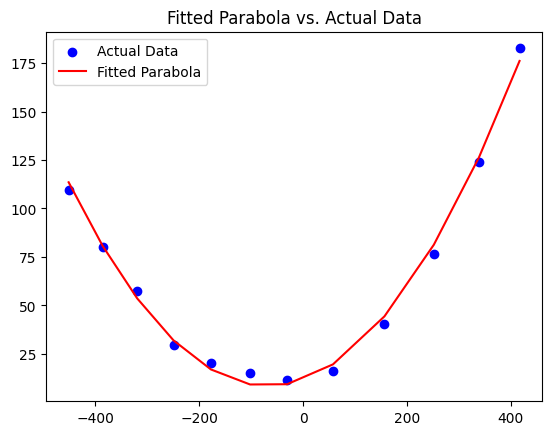

In [ ]:
import matplotlib.pyplot as plt

# Example: visualize the fit for the 10th swing
index = 9
club_x_face_x_data = club_x_face.iloc[index].values
club_x_face_y_data = club_y_face.iloc[index].values
club_x_face_y_pred = get_predicted_y(club_x_face_a_coeffs[index], club_x_face_b_coeffs[index], club_x_face_c_coeffs[index], club_x_face_x_data)

plt.scatter(club_x_face_x_data, club_x_face_y_data, color='blue', label='Actual Data')
plt.plot(club_x_face_x_data, club_x_face_y_pred, color='red', label='Fitted Parabola')
plt.legend()
plt.title('Fitted Parabola vs. Actual Data')
plt.show()

In [ ]:
ball_x_face

,ball_x_face_0,ball_x_face_1,ball_x_face_2,ball_x_face_3
0,-55.922735,-187.751970,-324.946670,-463.658955
1,-83.161045,-221.914845,-363.861265,-510.230525
2,-19.702380,-157.180300,-297.273565,-440.987065
3,-85.173480,-221.447530,-361.214930,-502.587955
4,-54.182560,-193.171995,-336.197810,-480.767580
...,...,...,...,...
88,-137.724750,-286.292600,-437.226325,-327.046150
89,-2.426265,-144.714600,-290.813830,-441.389270
90,-118.173250,-266.260525,-417.858550,-316.179950
91,-43.890360,-188.967540,-338.261110,-490.378060


In [ ]:
#df_5 = pd.read_csv("/content/drive/MyDrive/GolfDB/swing_video_files/launch_models/golf_data_2_club_ind.csv")

In [ ]:
df_5.head()

,video_id,ball_x_dtl_-5,ball_y_dtl_-5,club_x_dtl_-5,club_y_dtl_-5,club_dtl_-5_ind,ball_x_face_-5,ball_y_face_-5,club_x_face_-5,club_y_face_-5,...,ball_x_face_6,ball_y_face_6,club_x_face_6,club_y_face_6,club_face_6_ind,carry,swing_speed,ball_speed,launch_angle,apex
0,1,0,0,92.046895,108.162145,1,0,0,411.219944,168.690820,...,999,999,999,999,1,167.7,85.4,111.7,16.0,69.3
1,2,0,0,156.944365,188.133840,1,0,0,400.117195,174.457830,...,999,999,999,999,1,177.7,86.8,116.2,15.8,75.6
2,3,0,0,231.814905,356.211065,1,0,0,440.603234,210.407375,...,999,999,999,999,1,176.6,88.3,115.7,14.7,68.1
3,4,0,0,242.633895,395.966590,1,0,0,400.347230,163.420800,...,999,999,999,999,1,176.4,85.3,115.4,16.0,74.8
4,5,0,0,274.963900,449.121545,1,0,0,427.198217,197.934950,...,999,999,999,999,1,181.7,89.1,118.0,15.1,74.4


In [ ]:
df_3 = pd.read_csv("/content/drive/MyDrive/GolfDB/swing_video_files/launch_models/golf_data_2_9_frames.csv")

# # split features and target
# X = df_3.drop(columns=['video_id', 'carry', 'swing_speed', 'ball_speed', 'launch_angle', 'apex'])
# y = df_3['carry']

In [ ]:
df_3.head()

,video_id,ball_x_dtl_-5,ball_y_dtl_-5,club_x_dtl_-5,club_y_dtl_-5,ball_x_face_-5,ball_y_face_-5,club_x_face_-5,club_y_face_-5,ball_x_dtl_-4,...,club_y_dtl_3,ball_x_face_3,ball_y_face_3,club_x_face_3,club_y_face_3,carry,swing_speed,ball_speed,launch_angle,apex
0,1,0,0,92.046895,108.162145,0,0,411.219944,168.690820,0,...,157.805245,-463.658955,135.199570,-269.575220,31.433620,167.7,85.4,111.7,16.0,69.3
1,2,0,0,156.944365,188.133840,0,0,400.117195,174.457830,0,...,105.202770,-510.230525,145.853210,-291.191420,32.747310,177.7,86.8,116.2,15.8,75.6
2,3,0,0,231.814905,356.211065,0,0,440.603234,210.407375,0,...,64.181450,-440.987065,113.754650,-251.689915,17.538575,176.6,88.3,115.7,14.7,68.1
3,4,0,0,242.633895,395.966590,0,0,400.347230,163.420800,0,...,81.601440,-502.587955,156.671800,-282.533380,33.276750,176.4,85.3,115.4,16.0,74.8
4,5,0,0,274.963900,449.121545,0,0,427.198217,197.934950,0,...,108.921130,-480.767580,135.794225,-277.906235,30.070770,181.7,89.1,118.0,15.1,74.4


In [ ]:
# EDA
df_3.describe().T.tail(38)

,count,mean,std,min,25%,50%,75%,max
club_y_face_-1,93.0,20.252176,6.537611,8.214465,15.414965,19.086905,25.211875,33.441220
ball_x_dtl_0,93.0,-3.892808,6.724009,-31.326415,-5.788290,-2.581900,-0.265260,12.856625
ball_y_dtl_0,93.0,50.587993,38.808499,8.945085,23.471585,34.959730,55.256470,163.104385
club_x_dtl_0,93.0,9.428626,5.815136,-3.769130,5.790255,8.852815,12.862670,25.190275
club_y_dtl_0,93.0,17.422716,11.542479,5.031730,10.965200,13.664850,17.685060,61.182120
ball_x_face_0,93.0,-66.063775,41.983169,-137.724750,-102.187850,-64.476675,-25.587715,-2.426265
ball_y_face_0,93.0,18.804815,12.282449,0.380190,5.730700,19.401275,28.778800,41.489370
club_x_face_0,93.0,-29.328764,25.607053,-71.174790,-51.109800,-30.593525,-5.608955,10.917575
club_y_face_0,93.0,9.865456,3.342409,4.176820,7.424805,9.775165,11.933950,20.582370
ball_x_dtl_1,93.0,-10.510760,12.834435,-79.543810,-15.160950,-8.426075,-3.944705,16.116275


In [ ]:
# split features and target
X = df_3.drop(columns=['video_id', 'carry', 'swing_speed', 'ball_speed', 'launch_angle', 'apex'])
y = df_3['carry']

# split into train, test and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

# Standardize target
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_val = scaler_y.transform(y_val.values.reshape(-1, 1)).ravel()
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Reshape for LSTM
X_train = X_train_scaled.reshape((X_train.shape[0], 9, -1))
X_val = X_val_scaled.reshape((X_val.shape[0], 9, -1))
X_test = X_test_scaled.reshape((X_test.shape[0], 9, -1))


In [ ]:
from sklearn.model_selection import TimeSeriesSplit

# Split features and target
X = df_3.drop(columns=['video_id', 'carry', 'swing_speed', 'ball_speed', 'launch_angle', 'apex'])
y = df_3['carry']

# Standardize features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Standardize target
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Reshape for GRU/LSTM
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 9, -1))

tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X_reshaped):
    X_train, X_test = X_reshaped[train_index], X_reshaped[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [ ]:
from sklearn.model_selection import KFold

# 1. Prepare Data
X = df_3.drop(columns=['video_id', 'carry', 'swing_speed', 'ball_speed', 'launch_angle', 'apex'])
y = df_3['carry']

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

X_lstm = X_scaled.reshape((X.shape[0], 9, -1))

# 2. Define Model
def create_model():
    model = Sequential()
    model.add(Bidirectional(GRU(75, return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2]))))
    model.add(Dropout(0.3))
    model.add(Bidirectional(GRU(60, return_sequences=True)))
    model.add(Dropout(0.05))
    model.add(Bidirectional(GRU(45)))
    model.add(Dropout(0.05))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
    return model

# 3. KFold Split & Training
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_metrics = []

for train_index, val_index in kf.split(X_lstm, y_scaled):
    model = create_model()
    X_train, X_val = X_lstm[train_index], X_lstm[val_index]
    y_train, y_val = y_scaled[train_index], y_scaled[val_index]

    model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train,
        y_train,
        epochs=100,
        batch_size=196,
        validation_data=(X_val, y_val),
        verbose=2,
        callbacks=[early_stopping, model_checkpoint]
    )

    # 4. Metrics for this fold
    predictions = model.predict(X_val)
    predictions_original_scale = scaler_y.inverse_transform(predictions)
    y_val_original_scale = scaler_y.inverse_transform(y_val.reshape(-1, 1)).flatten()

    mae_original = mean_absolute_error(y_val_original_scale, predictions_original_scale)
    mse_original = mean_squared_error(y_val_original_scale, predictions_original_scale)
    rmse_original = np.sqrt(mse_original)
    r2_original = r2_score(y_val_original_scale, predictions_original_scale)
    val_loss_min = min(history.history['val_loss'])
    loss_min = min(history.history['loss'])

    fold_metrics.append({
        'MAE': mae_original,
        'MSE': mse_original,
        'RMSE': rmse_original,
        'R2': r2_original,
        'Val Loss Min': val_loss_min,
        'Loss Min': loss_min
    })

# After the loop
for i, metrics in enumerate(fold_metrics):
    print(f"Fold {i+1} Metrics:")
    for key, value in metrics.items():
        print(f"{key}: {value:.2f}")
    print("----------")

Epoch 1/100

Epoch 1: val_loss improved from inf to 1.49786, saving model to best_model.h5
1/1 - 23s - loss: 0.9314 - mae: 0.7613 - val_loss: 1.4979 - val_mae: 1.0458 - 23s/epoch - 23s/step
Epoch 2/100

Epoch 2: val_loss did not improve from 1.49786
1/1 - 0s - loss: 0.8912 - mae: 0.7420 - val_loss: 1.5553 - val_mae: 1.0586 - 100ms/epoch - 100ms/step
Epoch 3/100

Epoch 3: val_loss improved from 1.49786 to 1.49013, saving model to best_model.h5
1/1 - 0s - loss: 0.8714 - mae: 0.7458 - val_loss: 1.4901 - val_mae: 1.0360 - 162ms/epoch - 162ms/step
Epoch 4/100

Epoch 4: val_loss improved from 1.49013 to 1.43506, saving model to best_model.h5
1/1 - 0s - loss: 0.8469 - mae: 0.7375 - val_loss: 1.4351 - val_mae: 1.0145 - 163ms/epoch - 163ms/step
Epoch 5/100

Epoch 5: val_loss improved from 1.43506 to 1.40943, saving model to best_model.h5
1/1 - 0s - loss: 0.8653 - mae: 0.7388 - val_loss: 1.4094 - val_mae: 1.0048 - 169ms/epoch - 169ms/step
Epoch 6/100

Epoch 6: val_loss improved from 1.40943 to 1

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Preparing the data
X = df_3.drop(columns=['video_id', 'carry', 'swing_speed', 'ball_speed', 'launch_angle', 'apex'])
y = df_3['carry']

# Standardize features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Standardize target
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Reshape for LSTM
X_lstm = X_scaled.reshape((X.shape[0], 9, -1))

# Define the model (you can move it inside the loop if you want a fresh model for each fold)
def create_model():
    model = Sequential()
    model.add(Bidirectional(GRU(75, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
    model.add(Dropout(0.3))
    model.add(Bidirectional(GRU(60, return_sequences=True)))
    model.add(Dropout(0.05))
    model.add(Bidirectional(GRU(45)))
    model.add(Dropout(0.05))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
    # model = Sequential()
    # model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    # model.add(Bidirectional(LSTM(50)))
    # model.add(Dense(1))
    # model.compile(optimizer='adam', loss='mse')
    return model



n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

mse_scores = []

for train_idx, val_idx in kf.split(X_lstm, y_scaled):
    X_train_fold, X_val_fold = X_lstm[train_idx], X_lstm[val_idx]
    y_train_fold, y_val_fold = y_scaled[train_idx], y_scaled[val_idx]

    model = create_model()  # Get a fresh model for each fold
    model.fit(X_train_fold, y_train_fold, epochs=20, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=1)

    # Predict and evaluate on the validation data
    y_pred = model.predict(X_val_fold)
    mse = mean_squared_error(y_val_fold, y_pred)
    mse_scores.append(mse)

print(f"Mean MSE: {np.mean(mse_scores)}, Std MSE: {np.std(mse_scores)}")

Epoch 1/20
3/3 [==============================] - 17s 1s/step - loss: 1.0012 - mae: 0.7873 - val_loss: 1.4714 - val_mae: 1.0300
Epoch 2/20
3/3 [==============================] - 0s 60ms/step - loss: 0.8827 - mae: 0.7338 - val_loss: 1.2972 - val_mae: 0.9565
Epoch 3/20
3/3 [==============================] - 0s 56ms/step - loss: 0.8927 - mae: 0.7515 - val_loss: 1.3109 - val_mae: 0.9530
Epoch 4/20
3/3 [==============================] - 0s 54ms/step - loss: 0.8066 - mae: 0.7026 - val_loss: 1.5077 - val_mae: 1.0037
Epoch 5/20
3/3 [==============================] - 0s 65ms/step - loss: 0.8437 - mae: 0.7486 - val_loss: 1.5545 - val_mae: 1.0272
Epoch 6/20
3/3 [==============================] - 0s 56ms/step - loss: 0.8092 - mae: 0.7088 - val_loss: 1.3457 - val_mae: 0.9675
Epoch 7/20
3/3 [==============================] - 0s 55ms/step - loss: 0.7644 - mae: 0.6861 - val_loss: 1.2878 - val_mae: 0.9570
Epoch 8/20
3/3 [==============================] - 0s 62ms/step - loss: 0.7969 - mae: 0.7020 - val_

1/1 [==============================] - 3s 3s/step
Epoch 1/20
3/3 [==============================] - 17s 1s/step - loss: 1.1998 - mae: 0.8890 - val_loss: 0.6528 - val_mae: 0.6505
Epoch 2/20
3/3 [==============================] - 0s 63ms/step - loss: 1.0660 - mae: 0.8368 - val_loss: 0.5912 - val_mae: 0.5964
Epoch 3/20
3/3 [==============================] - 0s 54ms/step - loss: 1.0205 - mae: 0.8172 - val_loss: 0.6226 - val_mae: 0.6237
Epoch 4/20
3/3 [==============================] - 0s 53ms/step - loss: 1.0118 - mae: 0.7992 - val_loss: 0.6710 - val_mae: 0.6540
Epoch 5/20
3/3 [==============================] - 0s 62ms/step - loss: 0.9714 - mae: 0.7940 - val_loss: 0.6956 - val_mae: 0.6679
Epoch 6/20
3/3 [==============================] - 0s 56ms/step - loss: 0.9313 - mae: 0.7693 - val_loss: 0.6789 - val_mae: 0.6561
Epoch 7/20
3/3 [==============================] - 0s 60ms/step - loss: 0.9076 - mae: 0.7553 - val_loss: 0.6385 - val_mae: 0.6316
Epoch 8/20
3/3 [==============================] 

1/1 [==============================] - 3s 3s/step
Mean MSE: 0.9032600252404379, Std MSE: 0.18002309425908197


In [ ]:
      # Define the input layer
      input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

      # First Bidirectional GRU layer
      x = Bidirectional(GRU(75, return_sequences=True))(input_layer)
      x_res1 = x  # Store the output for a residual connection
      x = Dropout(i)(x)

      # Second Bidirectional GRU layer
      x = Bidirectional(GRU(75, return_sequences=True))(x)
      x = Add()([x, x_res1])  # Residual connection
      x_res2 = x  # Store the output for the next residual connection
      x = Dropout(j)(x)

      # Third Bidirectional GRU layer
      x = Bidirectional(GRU(75, return_sequences=True))(x)
      x = Add()([x, x_res2])  # Residual connection
      x = Dropout(j)(x)

      # Fourth Bidirectional GRU layer (adapt the output to vector form)
      x = Bidirectional(GRU(45))(x)

      # Dense layer
      output = Dense(1)(x)

      # Compile the model
      model = Model(inputs=input_layer, outputs=output)
      optimizer = Adam(learning_rate=0.001)
      model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])






      # Define the input layer
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

# First Bidirectional GRU layer
x = Bidirectional(GRU(75, return_sequences=True))(input_layer)
x_res1 = x  # Store the output for a residual connection
x = Dropout(0.15)(x)

# Second Bidirectional GRU layer
x = Bidirectional(GRU(75, return_sequences=True))(x)
x = Add()([x, x_res1])  # Residual connection
x_res2 = x  # Store the output for the next residual connection
x = Dropout(0.25)(x)

# Third Bidirectional GRU layer
x = Bidirectional(GRU(75, return_sequences=True))(x)
x = Add()([x, x_res2])  # Residual connection
x = Dropout(0.25)(x)

# Fourth Bidirectional GRU layer (adapt the output to vector form)
x = Bidirectional(GRU(75))(x)

# Dense layer
output = Dense(1)(x)

# Compile the model
model = Model(inputs=input_layer, outputs=output)
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])


In [ ]:
# Define the input layer
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

# First Bidirectional GRU layer
x = Bidirectional(GRU(75, return_sequences=True))(input_layer)
x_res1 = x  # Store the output for a residual connection
x = Dropout(0.15)(x)

# Second Bidirectional GRU layer
x = Bidirectional(GRU(75, return_sequences=True))(x)
x = Add()([x, x_res1])  # Residual connection
x_res2 = x  # Store the output for the next residual connection
x = Dropout(0.05)(x)

# Third Bidirectional GRU layer
x = Bidirectional(GRU(75, return_sequences=True))(x)
x = Add()([x, x_res2])  # Residual connection
x = Dropout(0.05)(x)

# Fourth Bidirectional GRU layer (adapt the output to vector form)
x = Bidirectional(GRU(75))(x)

# Dense layer
output = Dense(1)(x)

# Compile the model
model = Model(inputs=input_layer, outputs=output)
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

In [ ]:
# train model with early stopping
model_checkpoint = ModelCheckpoint('best_model.h5',
                                   monitor='val_loss',
                                   save_best_only=True,
                                   mode='min',
                                   verbose=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=196,
    validation_data=(X_val, y_val),
    verbose=2,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.61441, saving model to best_model.h5
1/1 - 31s - loss: 0.9877 - mae: 0.7942 - val_loss: 0.6144 - val_mae: 0.7150 - 31s/epoch - 31s/step
Epoch 2/100

Epoch 2: val_loss improved from 0.61441 to 0.57500, saving model to best_model.h5
1/1 - 0s - loss: 0.9610 - mae: 0.8029 - val_loss: 0.5750 - val_mae: 0.6476 - 226ms/epoch - 226ms/step
Epoch 3/100

Epoch 3: val_loss improved from 0.57500 to 0.47817, saving model to best_model.h5
1/1 - 0s - loss: 0.9387 - mae: 0.7925 - val_loss: 0.4782 - val_mae: 0.5961 - 224ms/epoch - 224ms/step
Epoch 4/100

Epoch 4: val_loss improved from 0.47817 to 0.43610, saving model to best_model.h5
1/1 - 0s - loss: 0.8684 - mae: 0.7435 - val_loss: 0.4361 - val_mae: 0.5741 - 222ms/epoch - 222ms/step
Epoch 5/100

Epoch 5: val_loss improved from 0.43610 to 0.41599, saving model to best_model.h5
1/1 - 0s - loss: 0.8148 - mae: 0.7118 - val_loss: 0.4160 - val_mae: 0.5545 - 206ms/epoch - 206ms/step
Epoch 6/100

Epoch 6: 

1/1 [==============================] - 0s 43ms/step - loss: 2.4243 - mae: 1.3314
Test Loss: [2.4242920875549316, 1.331404447555542]


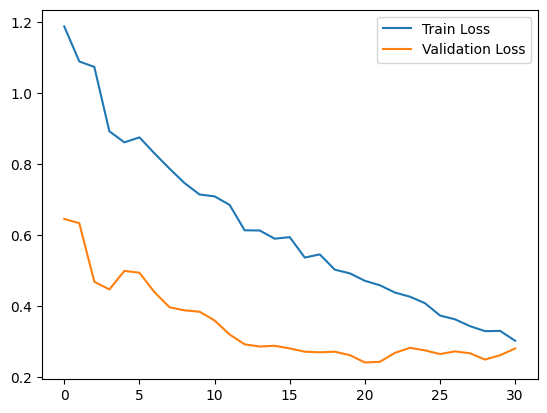

In [ ]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")

# Plotting training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Predict using the neural network
predictions = model.predict(X_val)

# Inverse transform the predictions and y_val to get them on the original scale
predictions_original_scale = scaler_y.inverse_transform(predictions)

# Reshape y_val to 2D and then inverse transform
y_val_original_scale = scaler_y.inverse_transform(y_val.reshape(-1, 1))

# Flatten y_val_original_scale to make it 1D again, for the computation of metrics
y_val_original_scale = y_val_original_scale.flatten()

# Compute metrics on the original scale
mae_original = mean_absolute_error(y_val_original_scale, predictions_original_scale)
mse_original = mean_squared_error(y_val_original_scale, predictions_original_scale)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_val_original_scale, predictions_original_scale)

# Print the metrics
print(f"Mean Absolute Error (MAE) on original scale: {mae_original:.2f}")
print(f"Mean Squared Error (MSE) on original scale: {mse_original:.2f}")
print(f"Root Mean Squared Error (RMSE) on original scale: {rmse_original:.2f}")
print(f"R-squared on original scale: {r2_original:.2f}")

print(min(history.history['val_loss']))
print(min(history.history['loss']))

1/1 [==============================] - 4s 4s/step
Mean Absolute Error (MAE) on original scale: 3.01
Mean Squared Error (MSE) on original scale: 12.66
Root Mean Squared Error (RMSE) on original scale: 3.56
R-squared on original scale: 0.48
0.2544018626213074
0.3110923171043396


In [ ]:
print(min(history.history['val_loss']))
print(min(history.history['loss']))

0.2544018626213074
0.3110923171043396


In [ ]:
# 1. Predict using the trained neural network on test data
test_predictions = model.predict(X_test)

# 2. Inverse transform the test predictions to get them on the original scale
test_predictions_original_scale = scaler_y.inverse_transform(test_predictions)

# 3. Reshape y_test to 2D and then inverse transform to get it on the original scale
y_test_original_scale = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_test_original_scale = y_test_original_scale.flatten()

# 4. Compute metrics on the original scale for test data
test_mae_original = mean_absolute_error(y_test_original_scale, test_predictions_original_scale)
test_mse_original = mean_squared_error(y_test_original_scale, test_predictions_original_scale)
test_rmse_original = np.sqrt(test_mse_original)
test_r2_original = r2_score(y_test_original_scale, test_predictions_original_scale)

# 5. Print the metrics for test data
print(f"Test Mean Absolute Error (MAE) on original scale: {test_mae_original:.2f}")
print(f"Test Mean Squared Error (MSE) on original scale: {test_mse_original:.2f}")
print(f"Test Root Mean Squared Error (RMSE) on original scale: {test_rmse_original:.2f}")
print(f"Test R-squared on original scale: {test_r2_original:.2f}")

1/1 [==============================] - 0s 66ms/step
Test Mean Absolute Error (MAE) on original scale: 9.36
Test Mean Squared Error (MSE) on original scale: 122.74
Test Root Mean Squared Error (RMSE) on original scale: 11.08
Test R-squared on original scale: -0.09


In [ ]:
# 4 multiple layers and batch size

units_ = []
dropouts_ = []
d_0 = []
train_loss = []
val_loss = []
epoch_train_loss = []
epoch_val_loss = []
epochs = []
mae = []
mse = []
rmse = []
r2 = []

# test different units
#l1_rates = [0.02, 0.01,  0.005, 0.001]
#l2_rates = [0.01,  0.005, 0.001]
learning_rates = [0.1, 0.01, 0.005]

#num_units = [36, 40, 44]
dropout_rates = [0.05, 0.15, 0.25, 0.35,  0.45]
dropout_rates_0 = [0.05, 0.15, 0.25, 0.35,  0.45]

for i in dropout_rates_0:
  for j in dropout_rates:
#    for k in l2_rates:
  #   for k in num_units:



      # Define the input layer
      input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

      # First Bidirectional GRU layer
      x = Bidirectional(GRU(75, return_sequences=True))(input_layer)
      x_res1 = x  # Store the output for a residual connection
      x = Dropout(i)(x)

      # Second Bidirectional GRU layer
      x = Bidirectional(GRU(75, return_sequences=True))(x)
      x = Add()([x, x_res1])  # Residual connection
      x_res2 = x  # Store the output for the next residual connection
      x = Dropout(j)(x)

      # Third Bidirectional GRU layer
      x = Bidirectional(GRU(75, return_sequences=True))(x)
      x = Add()([x, x_res2])  # Residual connection
      x = Dropout(j)(x)

      # Fourth Bidirectional GRU layer (adapt the output to vector form)
      x = Bidirectional(GRU(45))(x)

      # Dense layer
      output = Dense(1)(x)

      # Compile the model
      model = Model(inputs=input_layer, outputs=output)
      optimizer = Adam(learning_rate=0.001)
      model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])


      # train model with early stopping
      early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

      history = model.fit(
          X_train,
          y_train,
          epochs=100,
          batch_size=196,
          validation_data=(X_val, y_val),
          verbose=2,
          callbacks=[early_stopping]
      )

      # Predict using the neural network
      predictions = model.predict(X_val)

      # Inverse transform the predictions and y_val to get them on the original scale
      predictions_original_scale = scaler_y.inverse_transform(predictions)

      # Reshape y_val to 2D and then inverse transform
      y_val_original_scale = scaler_y.inverse_transform(y_val.reshape(-1, 1))

      # Flatten y_val_original_scale to make it 1D again, for the computation of metrics
      y_val_original_scale = y_val_original_scale.flatten()

      # Compute metrics on the original scale
      mae_original = mean_absolute_error(y_val_original_scale, predictions_original_scale)
      mse_original = mean_squared_error(y_val_original_scale, predictions_original_scale)
      rmse_original = np.sqrt(mse_original)
      r2_original = r2_score(y_val_original_scale, predictions_original_scale)

      #units_.append(i)
      dropouts_.append(j)
      # units_.append(k)
#      l2_.append(k)
      d_0.append(i)

      train_loss.append(min(history.history['loss']))
      val_loss.append(min(history.history['val_loss']))
      epoch_train_loss.append(np.argmin(history.history['loss']) + 1)
      epoch_val_loss.append(np.argmin(history.history['val_loss']) + 1)
      epochs.append(len(history.history['loss']))
      mae.append(mae_original)
      mse.append(mse_original)
      rmse.append(rmse_original)
      r2.append(r2_original)
      print(i, j)


Epoch 1/100
1/1 - 23s - loss: 0.9813 - mae: 0.7983 - val_loss: 0.6066 - val_mae: 0.6182 - 23s/epoch - 23s/step
Epoch 2/100
1/1 - 1s - loss: 1.0461 - mae: 0.8166 - val_loss: 0.4816 - val_mae: 0.6204 - 894ms/epoch - 894ms/step
Epoch 3/100
1/1 - 0s - loss: 0.8757 - mae: 0.7399 - val_loss: 0.5629 - val_mae: 0.6694 - 395ms/epoch - 395ms/step
Epoch 4/100
1/1 - 0s - loss: 0.8502 - mae: 0.7415 - val_loss: 0.5222 - val_mae: 0.6550 - 357ms/epoch - 357ms/step
Epoch 5/100
1/1 - 0s - loss: 0.8193 - mae: 0.7205 - val_loss: 0.4191 - val_mae: 0.5846 - 359ms/epoch - 359ms/step
Epoch 6/100
1/1 - 0s - loss: 0.7712 - mae: 0.7108 - val_loss: 0.3888 - val_mae: 0.5218 - 354ms/epoch - 354ms/step
Epoch 7/100
1/1 - 0s - loss: 0.7478 - mae: 0.6942 - val_loss: 0.3887 - val_mae: 0.5062 - 333ms/epoch - 333ms/step
Epoch 8/100
1/1 - 0s - loss: 0.7435 - mae: 0.6889 - val_loss: 0.3573 - val_mae: 0.4800 - 321ms/epoch - 321ms/step
Epoch 9/100
1/1 - 0s - loss: 0.6810 - mae: 0.6503 - val_loss: 0.3247 - val_mae: 0.4689 - 36

In [ ]:
dict = {'D_0': d_0, 'Dropout': dropouts_, 'MAE': mae, 'MSE': mse, 'RMSE':rmse, 'R2':r2, 'T_Loss': train_loss, 'V_Loss': val_loss,
        'Ep_Train': epoch_train_loss, 'Ep_Val':epoch_val_loss, 'Epochs': epochs}

print(pd.DataFrame(dict))

     D_0  Dropout       MAE        MSE      RMSE        R2    T_Loss  \
0   0.05     0.05  3.130089  13.343521  3.652878  0.456396  0.271396   
1   0.05     0.15  2.837482  11.012637  3.318529  0.551354  0.251405   
2   0.05     0.25  2.850954  10.203795  3.194338  0.584305  0.391685   
3   0.05     0.35  3.017032  12.304172  3.507730  0.498738  0.273225   
4   0.05     0.45  2.752111  10.165326  3.188311  0.585873  0.392948   
5   0.15     0.05  2.576461   9.841229  3.137073  0.599076  0.164430   
6   0.15     0.15  3.155335  12.691374  3.562495  0.482963  0.269058   
7   0.15     0.25  2.454767   9.032633  3.005434  0.632018  0.265489   
8   0.15     0.35  2.844147  10.361700  3.218960  0.577873  0.368055   
9   0.15     0.45  2.975262  11.501606  3.391402  0.531434  0.341923   
10  0.25     0.05  2.724399  11.882164  3.447051  0.515930  0.175008   
11  0.25     0.15  2.800295  10.156570  3.186937  0.586229  0.286043   
12  0.25     0.25  2.972879  11.592562  3.404785  0.527728  0.32

In [ ]:
# train model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_val, y_val),
    verbose=2,
    callbacks=[early_stopping]
)

Epoch 1/100
5/5 - 6s - loss: 1.0234 - val_loss: 0.5792 - 6s/epoch - 1s/step
Epoch 2/100
5/5 - 0s - loss: 0.9676 - val_loss: 0.5563 - 96ms/epoch - 19ms/step
Epoch 3/100
5/5 - 0s - loss: 0.9491 - val_loss: 0.5470 - 117ms/epoch - 23ms/step
Epoch 4/100
5/5 - 0s - loss: 0.9308 - val_loss: 0.5102 - 96ms/epoch - 19ms/step
Epoch 5/100
5/5 - 0s - loss: 0.9024 - val_loss: 0.4774 - 113ms/epoch - 23ms/step
Epoch 6/100
5/5 - 0s - loss: 0.8966 - val_loss: 0.4786 - 99ms/epoch - 20ms/step
Epoch 7/100
5/5 - 0s - loss: 0.9126 - val_loss: 0.4783 - 87ms/epoch - 17ms/step
Epoch 8/100
5/5 - 0s - loss: 0.9024 - val_loss: 0.4660 - 92ms/epoch - 18ms/step
Epoch 9/100
5/5 - 0s - loss: 0.8776 - val_loss: 0.4605 - 103ms/epoch - 21ms/step
Epoch 10/100
5/5 - 0s - loss: 0.8467 - val_loss: 0.4690 - 97ms/epoch - 19ms/step
Epoch 11/100
5/5 - 0s - loss: 0.8348 - val_loss: 0.4894 - 89ms/epoch - 18ms/step
Epoch 12/100
5/5 - 0s - loss: 0.8478 - val_loss: 0.5504 - 94ms/epoch - 19ms/step
Epoch 13/100
5/5 - 0s - loss: 0.8627 -

1/1 [==============================] - 0s 28ms/step - loss: 2.5296
Test Loss: 2.5295825004577637


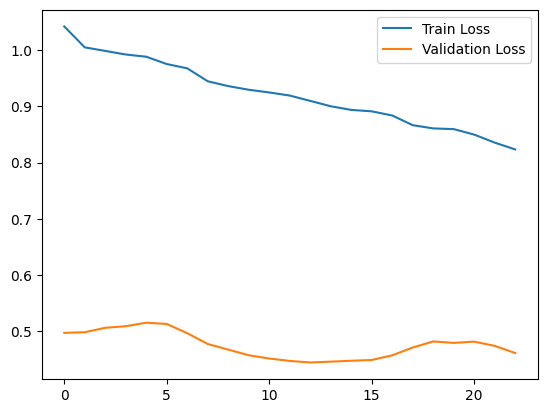

In [ ]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")

# Plotting training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Predict using the neural network
predictions = model.predict(X_val)

# Inverse transform the predictions and y_val to get them on the original scale
predictions_original_scale = scaler_y.inverse_transform(predictions)

# Reshape y_val to 2D and then inverse transform
y_val_original_scale = scaler_y.inverse_transform(y_val.reshape(-1, 1))

# Flatten y_val_original_scale to make it 1D again, for the computation of metrics
y_val_original_scale = y_val_original_scale.flatten()

# Compute metrics on the original scale
mae_original = mean_absolute_error(y_val_original_scale, predictions_original_scale)
mse_original = mean_squared_error(y_val_original_scale, predictions_original_scale)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_val_original_scale, predictions_original_scale)

# Print the metrics
print(f"Mean Absolute Error (MAE) on original scale: {mae_original:.2f}")
print(f"Mean Squared Error (MSE) on original scale: {mse_original:.2f}")
print(f"Root Mean Squared Error (RMSE) on original scale: {rmse_original:.2f}")
print(f"R-squared on original scale: {r2_original:.2f}")

1/1 [==============================] - 1s 1s/step
Mean Absolute Error (MAE) on original scale: 3.55
Mean Squared Error (MSE) on original scale: 16.19
Root Mean Squared Error (RMSE) on original scale: 4.02
R-squared on original scale: 0.34


In [ ]:
df_0 = pd.read_csv("/content/drive/MyDrive/GolfDB/swing_video_files/launch_models/golf_data_96.csv")

In [ ]:
df_0.head()

,video_id,ball_x_dtl_-5,ball_y_dtl_-5,club_x_dtl_-5,club_y_dtl_-5,ball_x_face_-5,ball_y_face_-5,club_x_face_-5,club_y_face_-5,ball_x_dtl_-4,...,club_y_dtl_6,ball_x_face_6,ball_y_face_6,club_x_face_6,club_y_face_6,carry,swing_speed,ball_speed,launch_angle,apex
0,1,0,0,92.046895,108.162145,0,0,411.219944,168.690820,0,...,275.762195,999,999,-487.131470,113.975945,167.7,85.4,111.7,16.0,69.3
1,2,0,0,156.944365,188.133840,0,0,400.117195,174.457830,0,...,210.290645,999,999,-513.850045,121.146260,177.7,86.8,116.2,15.8,75.6
2,3,0,0,231.814905,356.211065,0,0,440.603234,210.407375,0,...,151.365770,999,999,-468.841435,97.591735,176.6,88.3,115.7,14.7,68.1
3,4,0,0,242.633895,395.966590,0,0,400.347230,163.420800,0,...,178.406500,999,999,-493.985595,120.552350,176.4,85.3,115.4,16.0,74.8
4,5,0,0,274.963900,449.121545,0,0,427.198217,197.934950,0,...,221.419730,999,999,-502.477860,118.961680,181.7,89.1,118.0,15.1,74.4


In [ ]:
# split features and target
X = df_0.drop(columns=['video_id', 'carry', 'swing_speed', 'ball_speed', 'launch_angle', 'apex'])
y = df_0['carry']

# split into train, test and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

# Standardize target
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_val = scaler_y.transform(y_val.values.reshape(-1, 1)).ravel()
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Reshape for LSTM
X_train = X_train_scaled.reshape((X_train.shape[0], 12, -1))
X_val = X_val_scaled.reshape((X_val.shape[0], 12, -1))
X_test = X_test_scaled.reshape((X_test.shape[0], 12, -1))

# Bidirectional GRU-based model
model = Sequential()
model.add(Bidirectional(GRU(50), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
optimizer = Adam()  # lr=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 100)              18000     
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 18,101
Trainable params: 18,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_val, y_val),
    verbose=2,
    callbacks=[early_stopping]
)

Epoch 1/100
5/5 - 7s - loss: 1.0013 - val_loss: 0.4477 - 7s/epoch - 1s/step
Epoch 2/100
5/5 - 0s - loss: 0.9481 - val_loss: 0.4317 - 95ms/epoch - 19ms/step
Epoch 3/100
5/5 - 0s - loss: 0.9333 - val_loss: 0.4231 - 93ms/epoch - 19ms/step
Epoch 4/100
5/5 - 0s - loss: 0.9256 - val_loss: 0.4148 - 101ms/epoch - 20ms/step
Epoch 5/100
5/5 - 0s - loss: 0.8942 - val_loss: 0.3952 - 95ms/epoch - 19ms/step
Epoch 6/100
5/5 - 0s - loss: 0.8633 - val_loss: 0.3907 - 114ms/epoch - 23ms/step
Epoch 7/100
5/5 - 0s - loss: 0.8446 - val_loss: 0.4016 - 90ms/epoch - 18ms/step
Epoch 8/100
5/5 - 0s - loss: 0.8258 - val_loss: 0.4125 - 100ms/epoch - 20ms/step
Epoch 9/100
5/5 - 0s - loss: 0.8147 - val_loss: 0.4212 - 97ms/epoch - 19ms/step
Epoch 10/100
5/5 - 0s - loss: 0.8061 - val_loss: 0.4135 - 96ms/epoch - 19ms/step
Epoch 11/100
5/5 - 0s - loss: 0.8016 - val_loss: 0.3976 - 88ms/epoch - 18ms/step
Epoch 12/100
5/5 - 0s - loss: 0.7832 - val_loss: 0.3829 - 103ms/epoch - 21ms/step
Epoch 13/100
5/5 - 0s - loss: 0.7581 

1/1 [==============================] - 0s 29ms/step - loss: 2.3594
Test Loss: 2.3593738079071045


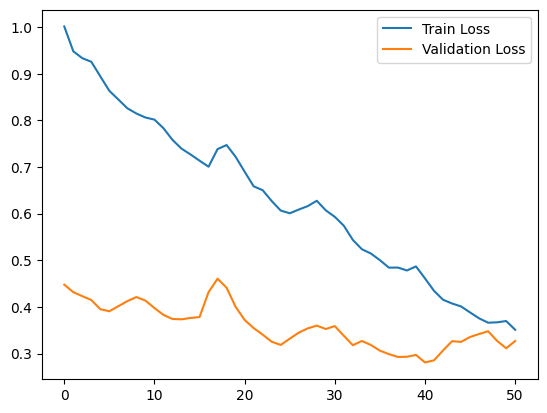

In [ ]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")

# Plotting training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict using the neural network
predictions = model.predict(X_val)

# Inverse transform the predictions and y_val to get them on the original scale
predictions_original_scale = scaler_y.inverse_transform(predictions)

# Reshape y_val to 2D and then inverse transform
y_val_original_scale = scaler_y.inverse_transform(y_val.reshape(-1, 1))

# Flatten y_val_original_scale to make it 1D again, for the computation of metrics
y_val_original_scale = y_val_original_scale.flatten()

# Compute metrics on the original scale
mae_original = mean_absolute_error(y_val_original_scale, predictions_original_scale)
mse_original = mean_squared_error(y_val_original_scale, predictions_original_scale)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_val_original_scale, predictions_original_scale)

# Print the metrics
print(f"Mean Absolute Error (MAE) on original scale: {mae_original:.2f}")
print(f"Mean Squared Error (MSE) on original scale: {mse_original:.2f}")
print(f"Root Mean Squared Error (RMSE) on original scale: {rmse_original:.2f}")
print(f"R-squared on original scale: {r2_original:.2f}")

1/1 [==============================] - 0s 42ms/step
Mean Absolute Error (MAE) on original scale: 3.01
Mean Squared Error (MSE) on original scale: 13.98
Root Mean Squared Error (RMSE) on original scale: 3.74
R-squared on original scale: 0.43


In [ ]:
final_df

,C1,C2,C3,C4,C5,C6,c_f_a,c_f_b,c_f_c,b_f_d,b_f_e,b_f_f,b_d_j,b_d_k,b_d_l,carry,swing_speed,ball_speed,launch_angle,apex
0,0.006564,-0.008982,0.002769,0.004742,0.014648,-0.999816,0.000663,0.104522,9.149958,0.000018,-0.284711,-0.754944,-0.254800,-19.961146,-19.575155,167.7,85.4,111.7,16.0,69.3
1,0.009311,-0.010496,0.002828,-0.194933,0.050595,0.979406,0.000672,0.126837,10.502367,0.000042,-0.257455,3.463963,0.073131,-5.715763,17.332402,177.7,86.8,116.2,15.8,75.6
2,-0.008094,0.009793,-0.003016,0.153956,-0.072044,-0.985361,0.000685,0.131861,11.334607,0.000032,-0.242492,0.636291,1.315985,-14.373007,-3.581045,176.6,88.3,115.7,14.7,68.1
3,-0.005706,0.005904,-0.001575,0.114757,-0.028379,-0.992953,0.000687,0.107290,6.829245,0.000011,-0.305808,0.324206,179.499672,69.478344,154.015135,176.4,85.3,115.4,16.0,74.8
4,-0.011680,0.012643,-0.003459,0.146555,-0.044702,-0.988036,0.000689,0.128303,10.365991,0.000020,-0.273633,-0.361437,0.934642,-15.630930,18.196816,181.7,89.1,118.0,15.1,74.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.004053,-0.003654,0.000797,-0.147741,0.061046,0.987125,0.000737,0.107023,7.234038,0.001046,0.331792,68.187832,-0.124258,-25.452739,-6.051981,196.1,93.7,125.8,16.7,99.8
89,-0.002974,0.002941,-0.000747,0.083986,-0.000169,-0.996458,0.000729,0.109637,7.616996,0.000003,-0.302587,-0.232750,-0.242851,-22.217566,-27.351989,194.8,92.5,124.3,15.7,89.7
90,-0.006399,0.006351,-0.001624,0.106714,-0.007492,-0.994219,0.000709,0.110697,6.997184,0.001169,0.358508,64.614487,-0.011870,-6.792549,-15.307253,192.4,89.7,123.9,17.7,101.6
91,0.012628,-0.012309,0.002899,-0.242903,0.102412,0.964464,0.000731,0.111802,10.730590,0.000006,-0.267748,-0.406381,0.092167,-8.789267,7.398305,192.6,94.7,124.3,16.8,97.8


In [ ]:
# Random Forest

# split features and target
X = final_df.drop(columns=['carry', 'swing_speed', 'ball_speed', 'launch_angle', 'apex'])
y = final_df['carry']    # swing_speed

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)  # Use X_train directly

# Predict
y_pred_train = rf_model.predict(X_train)
y_pred_val = rf_model.predict(X_val)  # Use X_val directly

# Calculate and print the RMSE for train and validation sets
# rf_train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
# rf_val_rmse = mean_squared_error(y_val, y_pred_val, squared=False)

# print(f"Random Forest Train RMSE: {rf_train_rmse:.2f}")
# print(f"Random Forest Validation RMSE: {rf_val_rmse:.2f}")


rf_val_mae = mean_absolute_error(y_val, y_pred_val)
rf_val_mse = mean_squared_error(y_val, y_pred_val)
rf_val_rmse = np.sqrt(rf_val_mse)
rf_val_r2 = r2_score(y_val, y_pred_val)

print(f"Random Forest Validation Mean Absolute Error (MAE): {rf_val_mae:.2f}")
print(f"Random Forest Validation Mean Squared Error (MSE): {rf_val_mse:.2f}")
print(f"Random Forest Validation Root Mean Squared Error (RMSE): {rf_val_rmse:.2f}")
print(f"Random Forest Validation R-squared: {rf_val_r2:.2f}")

Random Forest Validation Mean Absolute Error (MAE): 8.51
Random Forest Validation Mean Squared Error (MSE): 124.29
Random Forest Validation Root Mean Squared Error (RMSE): 11.15
Random Forest Validation R-squared: -0.78


In [ ]:
# Random Forest

# split features and target
X = df.drop(columns=['video_id', 'carry', 'swing_speed', 'ball_speed', 'launch_angle', 'apex'])
y = df['carry']

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)  # Use X_train directly

# Predict
y_pred_train = rf_model.predict(X_train)
y_pred_val = rf_model.predict(X_val)  # Use X_val directly

# Calculate and print the RMSE for train and validation sets
# rf_train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
# rf_val_rmse = mean_squared_error(y_val, y_pred_val, squared=False)

# print(f"Random Forest Train RMSE: {rf_train_rmse:.2f}")
# print(f"Random Forest Validation RMSE: {rf_val_rmse:.2f}")


rf_val_mae = mean_absolute_error(y_val, predictions)
rf_val_mse = mean_squared_error(y_val, predictions)
rf_val_rmse = np.sqrt(rf_val_mse)
rf_val_r2 = r2_score(y_val, predictions)

print(f"Random Forest Validation Mean Absolute Error (MAE): {mae:.2f}")
print(f"Random Forest Validation Mean Squared Error (MSE): {mse:.2f}")
print(f"Random Forest Validation Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Random Forest Validation R-squared: {r2:.2f}")

Random Forest Train RMSE: 2.84
Random Forest Validation RMSE: 5.61


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/GolfDB/swing_video_files/launch_models/golf_data_2.csv")

In [ ]:
df.head()

,video_id,ball_x_dtl_-5,ball_y_dtl_-5,club_x_dtl_-5,club_y_dtl_-5,ball_dtl_-5_ind,club_dtl_-5_ind,ball_x_face_-5,ball_y_face_-5,club_x_face_-5,...,ball_y_face_6,club_x_face_6,club_y_face_6,ball_face_6_ind,club_face_6_ind,carry,swing_speed,ball_speed,launch_angle,apex
0,1,0,0,92.046895,108.162145,1,1,0,0,411.219944,...,999,-487.131470,113.975945,0,1,167.7,85.4,111.7,16.0,69.3
1,2,0,0,156.944365,188.133840,1,1,0,0,400.117195,...,999,-513.850045,121.146260,0,1,177.7,86.8,116.2,15.8,75.6
2,3,0,0,231.814905,356.211065,1,1,0,0,440.603234,...,999,-468.841435,97.591735,0,1,176.6,88.3,115.7,14.7,68.1
3,4,0,0,242.633895,395.966590,1,1,0,0,400.347230,...,999,-493.985595,120.552350,0,1,176.4,85.3,115.4,16.0,74.8
4,5,0,0,274.963900,449.121545,1,1,0,0,427.198217,...,999,-502.477860,118.961680,0,1,181.7,89.1,118.0,15.1,74.4


In [ ]:
from google.colab import drive
drive.mount('/content/drive' # , force_remount=True
)


In [ ]:
from sklearn.model_selection import GroupShuffleSplit

df_3 = pd.read_csv("/content/drive/MyDrive/GolfDB/swing_video_files/launch_models/golf_data_2_9_frames.csv")

# split features and target
X = df_3.drop(columns=['video_id', 'carry', 'swing_speed', 'ball_speed', 'launch_angle', 'apex'])
y = df_3['carry']

# 1. GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_idx, temp_idx in gss.split(X, y, groups=df_3['video_id']):
    X_train, X_temp = X.iloc[train_idx], X.iloc[temp_idx]
    y_train, y_temp = y[train_idx], y[temp_idx]

# 2. Split the temp set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 3. Standardize and reshape
# Standardize features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

# Standardize target
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_val = scaler_y.transform(y_val.values.reshape(-1, 1)).ravel()
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Reshape for LSTM
X_train_lstm = X_train_scaled.reshape((X_train.shape[0], 9, -1))
X_val_lstm = X_val_scaled.reshape((X_val.shape[0], 9, -1))
X_test_lstm = X_test_scaled.reshape((X_test.shape[0], 9, -1))

In [ ]:
model = Sequential()
model.add(Bidirectional(GRU(100, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))))
model.add(Dropout(0.3))
model.add(Bidirectional(GRU(30)))
model.add(Dropout(0.05))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

In [ ]:
# train model with early stopping
model_checkpoint = ModelCheckpoint('best_model.h5',
                                   monitor='val_loss',
                                   save_best_only=True,
                                   mode='min',
                                   verbose=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_lstm,
    y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_val_lstm, y_val),
    verbose=2,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/100

Epoch 1: val_loss improved from inf to 1.53361, saving model to best_model.h5
5/5 - 17s - loss: 1.0250 - mae: 0.8123 - val_loss: 1.5336 - val_mae: 1.0496 - 17s/epoch - 3s/step
Epoch 2/100

Epoch 2: val_loss improved from 1.53361 to 1.52315, saving model to best_model.h5
5/5 - 0s - loss: 0.9453 - mae: 0.7780 - val_loss: 1.5232 - val_mae: 1.0488 - 207ms/epoch - 41ms/step
Epoch 3/100

Epoch 3: val_loss improved from 1.52315 to 1.49910, saving model to best_model.h5
5/5 - 0s - loss: 0.9191 - mae: 0.7690 - val_loss: 1.4991 - val_mae: 1.0351 - 243ms/epoch - 49ms/step
Epoch 4/100

Epoch 4: val_loss improved from 1.49910 to 1.43096, saving model to best_model.h5
5/5 - 0s - loss: 0.9026 - mae: 0.7676 - val_loss: 1.4310 - val_mae: 0.9936 - 226ms/epoch - 45ms/step
Epoch 5/100

Epoch 5: val_loss improved from 1.43096 to 1.38418, saving model to best_model.h5
5/5 - 0s - loss: 0.8169 - mae: 0.7085 - val_loss: 1.3842 - val_mae: 0.9569 - 210ms/epoch - 42ms/step
Epoch 6/100

Epoch 6: val_l

In [ ]:
# Predict using the neural network
predictions = model.predict(X_val_lstm)

# Inverse transform the predictions and y_val to get them on the original scale
predictions_original_scale = scaler_y.inverse_transform(predictions)

# Reshape y_val to 2D and then inverse transform
y_val_original_scale = scaler_y.inverse_transform(y_val.reshape(-1, 1))

# Flatten y_val_original_scale to make it 1D again, for the computation of metrics
y_val_original_scale = y_val_original_scale.flatten()

# Compute metrics on the original scale
mae_original = mean_absolute_error(y_val_original_scale, predictions_original_scale)
mse_original = mean_squared_error(y_val_original_scale, predictions_original_scale)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_val_original_scale, predictions_original_scale)

# Print the metrics
print(f"Mean Absolute Error (MAE) on original scale: {mae_original:.2f}")
print(f"Mean Squared Error (MSE) on original scale: {mse_original:.2f}")
print(f"Root Mean Squared Error (RMSE) on original scale: {rmse_original:.2f}")
print(f"R-squared on original scale: {r2_original:.2f}")

print(min(history.history['val_loss']))
print(min(history.history['loss']))

1/1 [==============================] - 2s 2s/step
Mean Absolute Error (MAE) on original scale: 6.56
Mean Squared Error (MSE) on original scale: 67.94
Root Mean Squared Error (RMSE) on original scale: 8.24
R-squared on original scale: 0.11
1.364811658859253
0.6473997831344604


In [ ]:
model = Sequential()
model.add(Bidirectional(GRU(75, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))))
model.add(Dropout(0.3))
model.add(Bidirectional(GRU(60, return_sequences=True)))
model.add(Dropout(0.05))
model.add(Bidirectional(GRU(45)))
model.add(Dropout(0.05))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

In [ ]:
# train model with early stopping
model_checkpoint = ModelCheckpoint('best_model.h5',
                                   monitor='val_loss',
                                   save_best_only=True,
                                   mode='min',
                                   verbose=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_lstm,
    y_train,
    epochs=100,
    batch_size=196,
    validation_data=(X_val_lstm, y_val),
    verbose=2,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/100

Epoch 1: val_loss improved from inf to 1.60735, saving model to best_model.h5
1/1 - 21s - loss: 1.0681 - mae: 0.8176 - val_loss: 1.6074 - val_mae: 1.0831 - 21s/epoch - 21s/step
Epoch 2/100

Epoch 2: val_loss improved from 1.60735 to 1.59008, saving model to best_model.h5
1/1 - 0s - loss: 0.9645 - mae: 0.7916 - val_loss: 1.5901 - val_mae: 1.0827 - 488ms/epoch - 488ms/step
Epoch 3/100

Epoch 3: val_loss improved from 1.59008 to 1.56205, saving model to best_model.h5
1/1 - 0s - loss: 0.9401 - mae: 0.7831 - val_loss: 1.5620 - val_mae: 1.0702 - 211ms/epoch - 211ms/step
Epoch 4/100

Epoch 4: val_loss improved from 1.56205 to 1.54155, saving model to best_model.h5
1/1 - 0s - loss: 0.9226 - mae: 0.7685 - val_loss: 1.5415 - val_mae: 1.0512 - 160ms/epoch - 160ms/step
Epoch 5/100

Epoch 5: val_loss improved from 1.54155 to 1.53677, saving model to best_model.h5
1/1 - 0s - loss: 0.9392 - mae: 0.7825 - val_loss: 1.5368 - val_mae: 1.0364 - 156ms/epoch - 156ms/step
Epoch 6/100

Epoch 6: 

In [ ]:
# Predict using the neural network
predictions = model.predict(X_val_lstm)

# Inverse transform the predictions and y_val to get them on the original scale
predictions_original_scale = scaler_y.inverse_transform(predictions)

# Reshape y_val to 2D and then inverse transform
y_val_original_scale = scaler_y.inverse_transform(y_val.reshape(-1, 1))

# Flatten y_val_original_scale to make it 1D again, for the computation of metrics
y_val_original_scale = y_val_original_scale.flatten()

# Compute metrics on the original scale
mae_original = mean_absolute_error(y_val_original_scale, predictions_original_scale)
mse_original = mean_squared_error(y_val_original_scale, predictions_original_scale)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_val_original_scale, predictions_original_scale)

# Print the metrics
print(f"Mean Absolute Error (MAE) on original scale: {mae_original:.2f}")
print(f"Mean Squared Error (MSE) on original scale: {mse_original:.2f}")
print(f"Root Mean Squared Error (RMSE) on original scale: {rmse_original:.2f}")
print(f"R-squared on original scale: {r2_original:.2f}")

print(min(history.history['val_loss']))
print(min(history.history['loss']))

1/1 [==============================] - 5s 5s/step
Mean Absolute Error (MAE) on original scale: 5.82
Mean Squared Error (MSE) on original scale: 66.90
Root Mean Squared Error (RMSE) on original scale: 8.18
R-squared on original scale: 0.12
1.3439217805862427
0.38840797543525696


In [ ]:
# 4 multiple layers and batch size

units_ = []
dropouts_ = []
d_0 = []
train_loss = []
val_loss = []
epoch_train_loss = []
epoch_val_loss = []
epochs = []
mae = []
mse = []
rmse = []
r2 = []


# test different units
#l1_rates = [0.02, 0.01,  0.005, 0.001]
#l2_rates = [0.01,  0.005, 0.001]
learning_rates = [0.1, 0.01, 0.005]
dropout_rates_0 = [0.05, 0.15, 0.25, 0.35,  0.45]


num_units = [40, 80, 120, 160]
dropout_rates = [0, 0.2, 0.4]

for i in dropout_rates:
  for j in num_units:


      model = Sequential()
      model.add(Bidirectional(GRU(j, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))))
      model.add(Dropout(i))
      model.add(Bidirectional(GRU(j)))
      model.add(Dropout(i))
      model.add(Dense(1))
      optimizer = Adam(learning_rate=0.001)
      model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])



      # train model with early stopping
      early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

      history = model.fit(
          X_train_lstm,
          y_train,
          epochs=100,
          batch_size=64,
          validation_data=(X_val_lstm, y_val),
          verbose=2,
          callbacks=[early_stopping]
      )

      # Predict using the neural network
      predictions = model.predict(X_val_lstm)

      # Inverse transform the predictions and y_val to get them on the original scale
      predictions_original_scale = scaler_y.inverse_transform(predictions)

      # Reshape y_val to 2D and then inverse transform
      y_val_original_scale = scaler_y.inverse_transform(y_val.reshape(-1, 1))

      # Flatten y_val_original_scale to make it 1D again, for the computation of metrics
      y_val_original_scale = y_val_original_scale.flatten()

      # Compute metrics on the original scale
      mae_original = mean_absolute_error(y_val_original_scale, predictions_original_scale)
      mse_original = mean_squared_error(y_val_original_scale, predictions_original_scale)
      rmse_original = np.sqrt(mse_original)
      r2_original = r2_score(y_val_original_scale, predictions_original_scale)

      units_.append(j)
      dropouts_.append(i)

      train_loss.append(min(history.history['loss']))
      val_loss.append(min(history.history['val_loss']))
      epoch_train_loss.append(np.argmin(history.history['loss']) + 1)
      epoch_val_loss.append(np.argmin(history.history['val_loss']) + 1)
      epochs.append(len(history.history['loss']))
      mae.append(mae_original)
      mse.append(mse_original)
      rmse.append(rmse_original)
      r2.append(r2_original)
      print(i, j)


Epoch 1/100
2/2 - 10s - loss: 1.0638 - mae: 0.8113 - val_loss: 1.6059 - val_mae: 1.0761 - 10s/epoch - 5s/step
Epoch 2/100
2/2 - 0s - loss: 1.0106 - mae: 0.7887 - val_loss: 1.6645 - val_mae: 1.1001 - 82ms/epoch - 41ms/step
Epoch 3/100
2/2 - 0s - loss: 1.0491 - mae: 0.8031 - val_loss: 1.7408 - val_mae: 1.1183 - 85ms/epoch - 42ms/step
Epoch 4/100
2/2 - 0s - loss: 1.1069 - mae: 0.8285 - val_loss: 1.7620 - val_mae: 1.1199 - 86ms/epoch - 43ms/step
Epoch 5/100
2/2 - 0s - loss: 1.1209 - mae: 0.8375 - val_loss: 1.7537 - val_mae: 1.1144 - 92ms/epoch - 46ms/step
Epoch 6/100
2/2 - 0s - loss: 1.1084 - mae: 0.8309 - val_loss: 1.7356 - val_mae: 1.1065 - 99ms/epoch - 50ms/step
Epoch 7/100
2/2 - 0s - loss: 1.0921 - mae: 0.8212 - val_loss: 1.7031 - val_mae: 1.0953 - 157ms/epoch - 78ms/step
Epoch 8/100
2/2 - 0s - loss: 1.0690 - mae: 0.8109 - val_loss: 1.6806 - val_mae: 1.0867 - 154ms/epoch - 77ms/step
Epoch 9/100
2/2 - 0s - loss: 1.0462 - mae: 0.7992 - val_loss: 1.6469 - val_mae: 1.0774 - 141ms/epoch - 7

In [ ]:
dict = {'Units': units_, 'Dropout': dropouts_, 'MAE': mae, 'MSE': mse, 'RMSE':rmse, 'R2':r2, 'T_Loss': train_loss, 'V_Loss': val_loss,
        'Ep_Train': epoch_train_loss, 'Ep_Val':epoch_val_loss, 'Epochs': epochs}

print(pd.DataFrame(dict))

    Units  Dropout       MAE        MSE      RMSE        R2    T_Loss  \
0      40      0.0  7.026808  69.233604  8.320673  0.090636  0.876824   
1      80      0.0  7.726687  87.420891  9.349914 -0.148249  0.987878   
2     120      0.0  6.655660  66.030446  8.125912  0.132708  0.793306   
3     160      0.0  6.160799  64.231907  8.014481  0.156332  0.789466   
4      40      0.2  7.249843  74.041592  8.604742  0.027484  0.944809   
5      80      0.2  7.047420  71.932264  8.481289  0.055190  0.891779   
6     120      0.2  7.697509  84.147012  9.173168 -0.105248  0.944185   
7     160      0.2  6.573578  66.885663  8.178366  0.121475  0.753870   
8      40      0.4  6.735403  71.339149  8.446251  0.062980  0.882223   
9      80      0.4  7.576636  78.637507  8.867779 -0.032882  0.948754   
10    120      0.4  6.856194  68.930183  8.302420  0.094621  0.962378   
11    160      0.4  6.450383  67.745596  8.230771  0.110180  0.742179   

      V_Loss  Ep_Train  Ep_Val  Epochs  
0   1.390

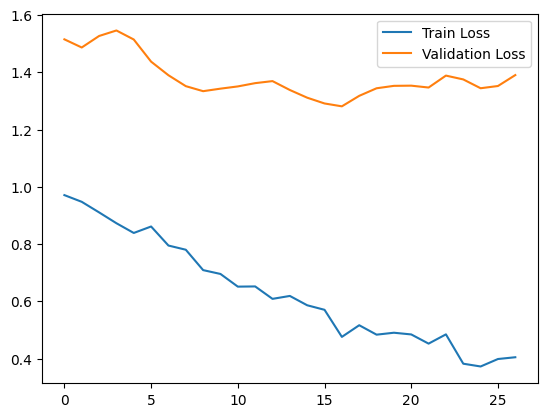

In [ ]:
# Plotting training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
# RF

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_val, and X_test are already split and don't require reshaping/scaling for RF
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on validation/test set
y_val_pred = rf.predict(X_val)
y_test_pred = rf.predict(X_test)

# Evaluation
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Validation MSE: {val_mse}")
print(f"Test MSE: {test_mse}")

# Feature importance
importances = rf.feature_importances_

Validation MSE: 1.6421923510692964
Test MSE: 1.6511675436529543


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming X_train, X_val, y_train, and y_val are already defined as in your previous code.

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)

# 2. Ridge Regression
ridge = Ridge(alpha=1.0) # You can change the alpha value for regularization strength
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_val)

# 3. Lasso Regression
lasso = Lasso(alpha=1.0) # You can change the alpha value for regularization strength
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_val)

# 4. Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=5) # You can adjust max_depth
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)

# 5. Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

# Now, let's evaluate the models:
models = [("Linear Regression", y_pred_lr),
          ("Ridge Regression", y_pred_ridge),
          ("Lasso Regression", y_pred_lasso),
          ("Decision Tree", y_pred_dt),
          ("Random Forest", y_pred_rf)]

for name, y_pred in models:
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)

    print(f"{name}:")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R^2: {r2:.4f}\n")

Linear Regression:
  MAE: 5.4581
  MSE: 39.9825
  RMSE: 6.3232
  R^2: -0.6289

Ridge Regression:
  MAE: 6.8748
  MSE: 115.9896
  RMSE: 10.7698
  R^2: -3.7253

Lasso Regression:
  MAE: 6.3643
  MSE: 103.6111
  RMSE: 10.1790
  R^2: -3.2210

Decision Tree:
  MAE: 5.6460
  MSE: 44.7255
  RMSE: 6.6877
  R^2: -0.8221

Random Forest:
  MAE: 4.9934
  MSE: 33.8202
  RMSE: 5.8155
  R^2: -0.3778



In [ ]:
# Get feature importance
coef = lasso.coef_
importance = np.abs(coef)

# Sort the feature names based on the magnitude of their coefficients
sorted_idx = np.argsort(importance)[::-1]

# Print the feature names and their corresponding importance values
for index in sorted_idx:
    print(f"{X_train.columns[index]}: {importance[index]}")

c_f_c: 0.33338521810465194
b_f_f: 0.1321228897995338
b_d_j: 0.015955785063602176
b_d_l: 0.007158188230147276
b_d_k: 2.8836124696444088e-05
b_f_e: 0.0
b_f_d: 0.0
c_f_b: 0.0
c_f_a: 0.0
C6: 0.0
C5: 0.0
C4: 0.0
C3: 0.0
C2: 0.0
C1: 0.0


In [ ]:
a = X_train[['club_x_face_-5', 'ball_x_face_2', 'club_x_face_-4', 'club_x_dtl_3', 'club_x_dtl_-3', 'club_y_dtl_-2', 'ball_x_face_3',
         'ball_y_dtl_1', 'ball_y_dtl_2']]

b = X_val[['club_x_face_-5', 'ball_x_face_2', 'club_x_face_-4', 'club_x_dtl_3', 'club_x_dtl_-3', 'club_y_dtl_-2', 'ball_x_face_3',
         'ball_y_dtl_1', 'ball_y_dtl_2']]

In [ ]:
a

,club_x_face_-5,ball_x_face_2,club_x_face_-4,club_x_dtl_3,club_x_dtl_-3,club_y_dtl_-2,ball_x_face_3,ball_y_dtl_1,ball_y_dtl_2
1,400.117195,-363.861265,323.713395,40.197760,62.886690,25.805520,-510.230525,72.851820,196.980465
2,440.603234,-297.273565,367.309600,38.250205,41.198935,19.661325,-440.987065,95.744125,135.517830
3,400.347230,-361.214930,323.009925,36.230720,74.226195,43.983900,-502.587955,135.548035,177.768850
5,439.135889,-307.341325,364.511998,40.647525,255.884550,303.512020,-449.367545,77.502450,197.521345
6,407.247540,-377.104420,329.336915,21.725015,63.849220,25.093705,-526.383350,71.901635,120.778135
...,...,...,...,...,...,...,...,...,...
87,414.361685,-374.657725,343.703925,26.855715,52.247225,25.196400,-521.216975,74.072130,122.563850
88,398.935155,-437.226325,313.723705,73.048910,78.940030,46.450430,-327.046150,144.446305,250.738880
89,456.684549,-290.813830,386.711307,44.734675,188.702535,11.900395,-441.389270,107.971500,227.084475
91,451.611033,-338.261110,373.884425,32.567445,46.173275,24.922350,-490.378060,89.325650,133.859675


In [ ]:
import xgboost as xgb

# Create and train the model
gbm_model = xgb.XGBRegressor(objective ='reg:squarederror')
gbm_model.fit(X_train, y_train)

# Predict on validation data
gbm_preds = gbm_model.predict(X_val)

# Evaluate
gbm_mae = mean_absolute_error(y_val, gbm_preds)
gbm_mse = mean_squared_error(y_val, gbm_preds)
gbm_rmse = np.sqrt(gbm_mse)
gbm_r2 = r2_score(y_val, gbm_preds)

print(f"Gradient Boosting:\n  MAE: {gbm_mae:.4f}\n  MSE: {gbm_mse:.4f}\n  RMSE: {gbm_rmse:.4f}\n  R^2: {gbm_r2:.4f}")

Gradient Boosting:
  MAE: 4.7403
  MSE: 34.1439
  RMSE: 5.8433
  R^2: -0.3910


In [ ]:
from sklearn.svm import SVR

# Create and train the model
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Predict on validation data
svr_preds = svr_model.predict(X_val)

# Evaluate
svr_mae = mean_absolute_error(y_val, svr_preds)
svr_mse = mean_squared_error(y_val, svr_preds)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_val, svr_preds)

print(f"SVR:\n  MAE: {svr_mae:.4f}\n  MSE: {svr_mse:.4f}\n  RMSE: {svr_rmse:.4f}\n  R^2: {svr_r2:.4f}")

SVR:
  MAE: 4.3369
  MSE: 24.4177
  RMSE: 4.9414
  R^2: 0.0052


In [ ]:
from sklearn.svm import SVR

# Create and train the model
svr_model = SVR()
svr_model.fit(a, y_train)

# Predict on validation data
svr_preds = svr_model.predict(b)

# Evaluate
svr_mae = mean_absolute_error(y_val, svr_preds)
svr_mse = mean_squared_error(y_val, svr_preds)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_val, svr_preds)

print(f"SVR:\n  MAE: {svr_mae:.4f}\n  MSE: {svr_mse:.4f}\n  RMSE: {svr_rmse:.4f}\n  R^2: {svr_r2:.4f}")

SVR:
  MAE: 1.0349
  MSE: 1.4722
  RMSE: 1.2133
  R^2: 0.0374


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Create model architecture
nn_model = Sequential()
nn_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))

# Compile the model
nn_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Train the model
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=2)

# Predict on validation data
nn_preds = nn_model.predict(X_val).flatten()

# Evaluate
nn_mae = mean_absolute_error(y_val, nn_preds)
nn_mse = mean_squared_error(y_val, nn_preds)
nn_rmse = np.sqrt(nn_mse)
nn_r2 = r2_score(y_val, nn_preds)

print(f"Neural Network:\n  MAE: {nn_mae:.4f}\n  MSE: {nn_mse:.4f}\n  RMSE: {nn_rmse:.4f}\n  R^2: {nn_r2:.4f}")

Epoch 1/100
3/3 - 2s - loss: 33902.6914 - mae: 183.8743 - val_loss: 30515.3887 - val_mae: 172.0115 - 2s/epoch - 563ms/step
Epoch 2/100
3/3 - 0s - loss: 32666.3535 - mae: 180.5895 - val_loss: 29841.1602 - val_mae: 171.5381 - 65ms/epoch - 22ms/step
Epoch 3/100
3/3 - 0s - loss: 31586.4180 - mae: 177.5193 - val_loss: 34779.6562 - val_mae: 183.1079 - 64ms/epoch - 21ms/step
Epoch 4/100
3/3 - 0s - loss: 30496.2520 - mae: 174.2856 - val_loss: 47767.1875 - val_mae: 196.0968 - 44ms/epoch - 15ms/step
Epoch 5/100
3/3 - 0s - loss: 29396.2852 - mae: 170.7528 - val_loss: 68343.9766 - val_mae: 208.8123 - 42ms/epoch - 14ms/step
Epoch 6/100
3/3 - 0s - loss: 28242.2285 - mae: 166.5847 - val_loss: 98658.5859 - val_mae: 222.3795 - 43ms/epoch - 14ms/step
Epoch 7/100
3/3 - 0s - loss: 27186.2246 - mae: 162.3935 - val_loss: 146139.1094 - val_mae: 238.6215 - 50ms/epoch - 17ms/step
Epoch 8/100
3/3 - 0s - loss: 26085.5156 - mae: 158.0625 - val_loss: 220751.0938 - val_mae: 258.5237 - 63ms/epoch - 21ms/step
Epoch 9

In [ ]:
df_3

,video_id,ball_x_dtl_-5,ball_y_dtl_-5,club_x_dtl_-5,club_y_dtl_-5,ball_x_face_-5,ball_y_face_-5,club_x_face_-5,club_y_face_-5,ball_x_dtl_-4,...,club_y_dtl_3,ball_x_face_3,ball_y_face_3,club_x_face_3,club_y_face_3,carry,swing_speed,ball_speed,launch_angle,apex
0,1,0,0,92.046895,108.162145,0,0,411.219944,168.690820,0,...,157.805245,-463.658955,135.199570,-269.575220,31.433620,167.7,85.4,111.7,16.0,69.3
1,2,0,0,156.944365,188.133840,0,0,400.117195,174.457830,0,...,105.202770,-510.230525,145.853210,-291.191420,32.747310,177.7,86.8,116.2,15.8,75.6
2,3,0,0,231.814905,356.211065,0,0,440.603234,210.407375,0,...,64.181450,-440.987065,113.754650,-251.689915,17.538575,176.6,88.3,115.7,14.7,68.1
3,4,0,0,242.633895,395.966590,0,0,400.347230,163.420800,0,...,81.601440,-502.587955,156.671800,-282.533380,33.276750,176.4,85.3,115.4,16.0,74.8
4,5,0,0,274.963900,449.121545,0,0,427.198217,197.934950,0,...,108.921130,-480.767580,135.794225,-277.906235,30.070770,181.7,89.1,118.0,15.1,74.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,0,0,183.037055,295.180925,0,0,398.935155,169.195325,0,...,174.738655,-327.046150,45.723275,-328.977485,50.473525,196.1,93.7,125.8,16.7,99.8
89,90,0,0,356.765185,544.138600,0,0,456.684549,221.584705,0,...,140.931820,-441.389270,133.628950,-253.965400,27.694280,194.8,92.5,124.3,15.7,89.7
90,91,0,0,244.085505,394.008425,0,0,406.110480,173.245450,0,...,71.517335,-316.179950,36.561750,-314.911400,41.990080,192.4,89.7,123.9,17.7,101.6
91,92,0,0,126.686575,193.071150,0,0,451.611033,218.962660,0,...,72.277945,-490.378060,132.325325,-281.078130,38.102650,192.6,94.7,124.3,16.8,97.8


In [ ]:
df_0.drop([5,13,24,25,54,59,64,75,87], inplace=True)

In [ ]:
df_6 = pd.read_csv("/content/drive/MyDrive/GolfDB/swing_video_files/launch_models/golf_data_54.csv")
df_6.drop([5,13,24,25,54,59,64,75,87], inplace=True)

In [ ]:
df_6.drop([5,13,24,25,54,59,64,75,87], inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split


# attempt at parabola
# X = final_df.drop(['carry', 'swing_speed', 'ball_speed', 'launch_angle', 'apex'], axis=1)  # predictors
# y = final_df['carry']  # target variable




X = df_6.drop([ 'carry', 'swing_speed', 'ball_speed', 'launch_angle', 'apex'], axis=1)        #'video_id', 'carry', 'swing_speed', 'ball_speed', 'launch_angle', 'apex'], axis=1)  # predictors
y = df_6['carry']  # target variable


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data into train and temp (which will be further split into validation and test sets)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Splitting temp data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# no longer val

from sklearn.model_selection import train_test_split

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [ ]:
from sklearn.preprocessing import StandardScaler

# For features
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
#X_val_scaled = X_scaler.transform(X_val)
X_test_scaled = X_scaler.transform(X_test)

# For target variable
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
#y_val_scaled = y_scaler.transform(y_val.values.reshape(-1, 1)).ravel()
y_test_scaled = y_scaler.fit_transform(y_test.values.reshape(-1, 1)).ravel()

In [ ]:
# Predict Mean for All

# Compute mean of the training dataset
mean_train = y_train.mean()

# Predict using the mean value for all test data points
y_pred_mean = [mean_train] * len(y_test)

# Compute metrics for the mean model
mse_mean = mean_squared_error(y_test, y_pred_mean)
r2_mean = r2_score(y_test, y_pred_mean)
rmse_mean = np.sqrt(mse_mean)
mae_mean = mean_absolute_error(y_test, y_pred_mean)

print(f'Mean Model MSE: {mse_mean}')
print(f'Mean Model R^2: {r2_mean}')
print(f'Mean Model RMSE: {rmse_mean}')
print(f'Mean Model MAE: {mae_mean}')

Mean Model MSE: 59.83823584560536
Mean Model R^2: -0.5778598957587344
Mean Model RMSE: 7.735517813669965
Mean Model MAE: 6.262201591511961


In [ ]:
# 1. Compute the mean of y_train
y_train_mean = y_train.mean()

# 2. Make predictions on the test set using this mean
y_pred_mean = np.full(y_test.shape, y_train_mean)

# 3. Compute metrics for these average-based predictions

# R^2
r2_mean = r2_score(y_test, y_pred_mean)
print(f'Mean Model R^2 on Test Data: {r2_mean}')

# RMSE
mse_mean = mean_squared_error(y_test, y_pred_mean)
rmse_mean = np.sqrt(mse_mean)
print(f'Mean Model RMSE on Test Data: {rmse_mean}')

# MAE
mae_mean = mean_absolute_error(y_test, y_pred_mean)
print(f'Mean Model MAE on Test Data: {mae_mean}')

Mean Model R^2 on Test Data: -0.5778598957587344
Mean Model RMSE on Test Data: 7.735517813669965
Mean Model MAE on Test Data: 6.262201591511961


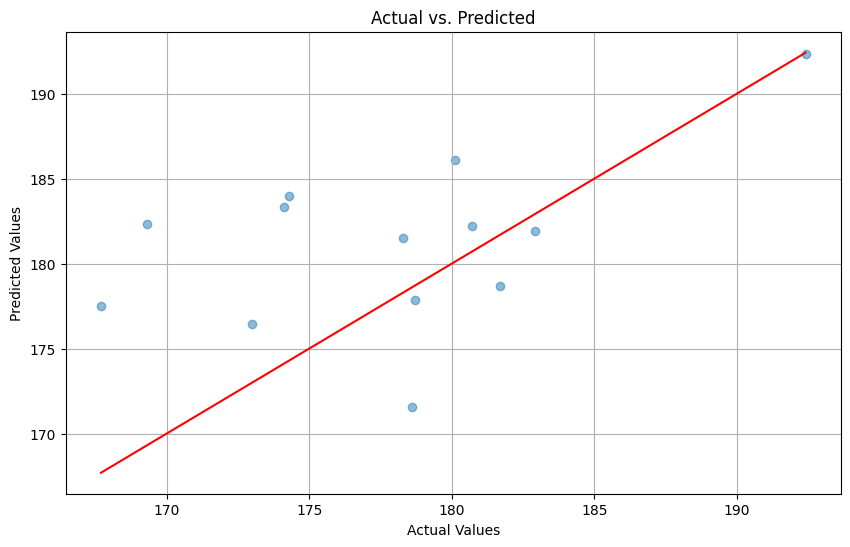

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # a diagonal line for perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.grid(True)
plt.show()